In [1]:
library(matrixStats)
library("randomForest")
library(e1071)

#install.packages("tidyverse")
library(tidyverse)
library(modelr)
# Data Handling

if (!requireNamespace("BiocManager"))
    install.packages("BiocManager")
BiocManager::install()
library(BiocManager)
# General bioinformatics packages

library(BSgenome)
library(BSgenome.Hsapiens.UCSC.hg19)
# Human genome build GChr37

library(biomaRt)


randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Warning message:
“package ‘e1071’ was built under R version 3.5.2”── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  2.0.1     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘tibble’ was built under R version 3.5.2”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine()  masks randomForest::combine()
✖ dplyr::count()    masks matrixStats::count()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ ggplot2::margin() masks randomForest::margin()
Loading required namespace: BiocManager
Bioconductor version 3.8 (BiocManager 1.30.3), R 3.5.1 (2018-07-02)
Update old packages: 'annotate', 'assertthat', 'backports', 'BiocInstaller',
  'BiocManager', 'BiocParallel', 'Biostrings', 'biovizBase', 'broom', 'Cairo

In [2]:
source("TMB_Funcs.txt")
# My Stuff!

path_name <- "/Volumes/CCG8/processed_data"
genome <- BSgenome.Hsapiens.UCSC.hg19
ensembl = useMart("ensembl", dataset = "hsapiens_gene_ensembl")
select <- dplyr::select

### Load Data

In [3]:
# three_cancer_data <- cbio_getData(path_name, c("nsclc", "lusc", "skcm"), by_cancer = TRUE)
# lung_data <- list()
# lung_data[["training_data"]] <- three_cancer_data[["training_data"]] %>% 
#     filter(cancer_type == "nsclc") %>% 
#     select(-cancer_type)

# lung_data[["test_data"]] <- three_cancer_data[["test_data"]] %>% 
#     filter(cancer_type == "nsclc") %>% 
#     select(-cancer_type)

# write_rds(three_cancer_data, "/Users/jacobbradley/Documents/CCG/Data/three_cancer_data")
# write_rds(lung_data, "/Users/jacobbradley/Documents/CCG/Data/lung_data")

three_cancer_data <- read_rds("/Users/jacobbradley/Documents/CCG/Data/three_cancer_data")
lung_data <- read_rds("/Users/jacobbradley/Documents/CCG/Data/lung_data")


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "lusc_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Transcript_Exon = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  gc_content = col_double()
)
See spec(...) for full column specifications.


[1] 178


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "lusc_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 469


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "lusc_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double()
  # ... with 23 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“9 parsing failures.
row # A tibble: 5 x 5 col     row col        expected      actual file                                     expect

[1] 64


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "nsclc_pd1_msk_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 240


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "nsclc_tcga_broad_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_depth = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double()
  # ... with 24 more columns
)
See spec(...) for full column specifications.


[1] 1144


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "nsclc_unito_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Allelic_Frequency = col_double()
)
See spec(...) for full column specifications.


[1] 0


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "skcm_broad"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  tumor_allele_fraction = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_EAS = col_double(),
  MOTIF_POS = col_integer()
  # ... with 6 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“9 parsing failures.
row # A tibble: 5 x 5 col      row col     expected  actual file                              

[1] 121


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_broad_dfarber"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 3 more columns
)
See spec(...) for full column specifications.
Warning message:
“2 parsing failures.
row # A tibble: 2 x 5 col     row col    expected      actual                 file                         expected   <int> <chr>  <chr>         <chr>                  <chr>                        actual 1  1343 PUBMED no trailing … ,241,0

[1] 25


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Transcript_Exon = col_integer(),
  qox = col_double(),
  isArtifactMode = col_integer(),
  pox = col_double(),
  gc_content = col_double(),
  Hotspot = col_integer(),
  UniProt_AApos = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  Protein_position = col_integer(),
  pox_cutoff = col_integer(),
  oxoGCut = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“150071 parsing failures.
row # A tibble: 5 x 5 col     row col      expected         actual file                                    expected   <int> <chr>    <chr>            <chr

[1] 368


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 440


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_ucla_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  NCBI_Build = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer()
)
See spec(...) for full column specifications.


[1] 38


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_vanderbilt_mskcc_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 66


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_yale"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `MA:FIS` = col_double(),
  Phylop_Conservation_Score = col_double()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“1138 parsing failures.
row # A tibble: 5 x 5 col     row col       expected  actual file                                          expected   <int> <chr>     <chr>     <chr>  <chr>                                         actual 1 24374 Chromoso… an integ… X      '/Volumes/CCG8/processed_data/skcm_yale/data… file 2 24375 Chromoso… an integ… X      '/Volumes/CCG8/processed_data/skcm_yale/data… row 3 24376 Chromoso… an integ… X      '/Volumes/CCG8/processed_data/skcm_yale/data… c

[1] 2602
[1] 1821
[1] 781


### Looking at the distribution across genes of TMB correlation

In [6]:
tmb_table <- TMB_Calc(lung_data[["training_data"]]) %>% select(-study)

In [6]:
nsclc_gene <- gene_TMB_Calc(lung_data[["training_data"]])

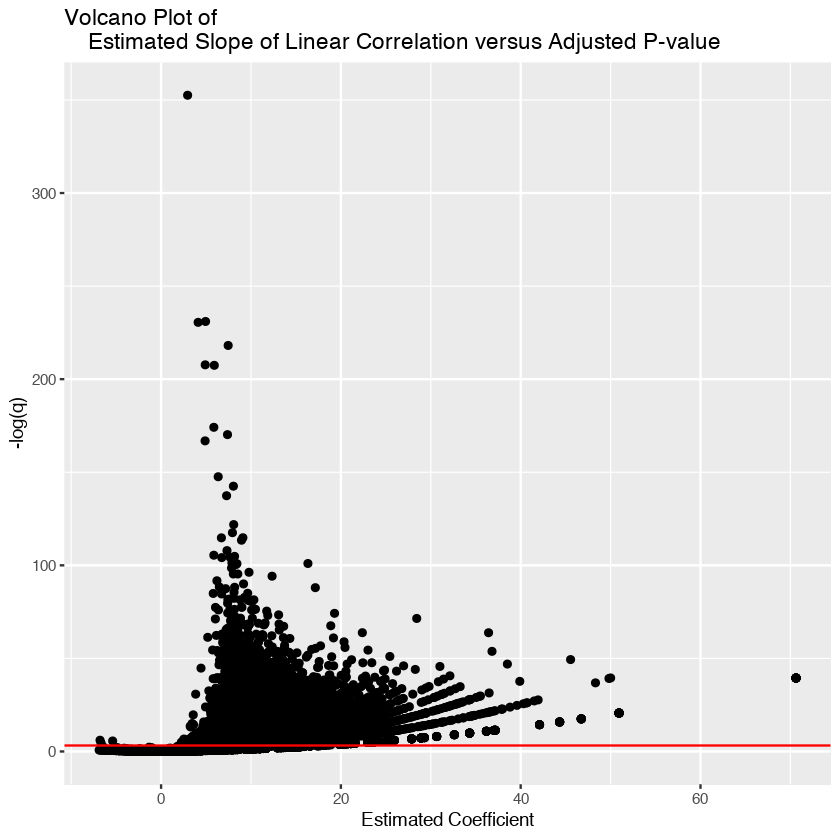

In [7]:
nsclc_gene %>% 
    ggplot(aes(x = unlist(coefficient), y = -log(unlist(p_val)))) + geom_point() + 
    geom_hline(yintercept = -log(0.05), colour = "red") + ggtitle("Volcano Plot of 
    Estimated Slope of Linear Correlation versus Adjusted P-value") + labs(x = "Estimated Coefficient", y = "-log(q)")

### Different methods of selecting genes

In [8]:
nsclc_gene_stats <- get_gene_stats(nsclc_gene)
 
genes_by_p <- (nsclc_gene_stats %>% 
    arrange(desc(p_val_rank)) %>% 
    pull(Hugo_Symbol))[1:100]

genes_by_coeff <- (nsclc_gene_stats %>% 
    arrange(desc(coefficient_rank)) %>% 
    pull(Hugo_Symbol))[1:100]

genes_by_sum <- (nsclc_gene_stats %>% 
    arrange(desc(coefficient_rank + p_val_rank)) %>% 
    pull(Hugo_Symbol))[1:100]

genes_by_min <- (nsclc_gene_stats %>% 
    arrange(desc(pmin(coefficient_rank, p_val_rank))) %>% 
    pull(Hugo_Symbol))[1:100]



In [9]:
get_model_stats(genes_by_p, lung_data[["training_data"]])
get_model_stats(genes_by_coeff, lung_data[["training_data"]])
get_model_stats(genes_by_sum, lung_data[["training_data"]])
get_model_stats(genes_by_min, lung_data[["training_data"]])

[1] 4130.034

[1] 6324.549

[1] 5800.629

[1] 5707.765

In [10]:
test_matrix_p <- get_gene_matrix(lung_data[["test_data"]], genes_by_p); test_matrix_c <- get_gene_matrix(lung_data[["test_data"]], genes_by_coeff)
test_matrix_s <- get_gene_matrix(lung_data[["test_data"]], genes_by_sum); test_matrix_m <- get_gene_matrix(lung_data[["test_data"]], genes_by_min)

message("lin")
testModel(get_gene_model(genes_by_p, lung_data[["training_data"]]), test_matrix_p, type = "Cmin")
testModel(get_gene_model(genes_by_coeff, lung_data[["training_data"]]), test_matrix_c, type = "Cmin")
testModel(get_gene_model(genes_by_sum, lung_data[["training_data"]]), test_matrix_s, type = "Cmin")
testModel(get_gene_model(genes_by_min, lung_data[["training_data"]]), test_matrix_m, type = "Cmin")

message("rf")
testModel(get_gene_f_model(genes_by_p, lung_data[["training_data"]]), test_matrix_p, type = "Cmin")
testModel(get_gene_f_model(genes_by_coeff, lung_data[["training_data"]]), test_matrix_c, type = "Cmin")
testModel(get_gene_f_model(genes_by_sum, lung_data[["training_data"]]), test_matrix_s, type = "Cmin")
testModel(get_gene_f_model(genes_by_min, lung_data[["training_data"]]), test_matrix_m, type = "Cmin")

message("svm")
testModel(get_gene_svm_model(genes_by_p, lung_data[["training_data"]]), test_matrix_p, type = "Cmin")
testModel(get_gene_svm_model(genes_by_coeff, lung_data[["training_data"]]), test_matrix_c, type = "Cmin")
testModel(get_gene_svm_model(genes_by_sum, lung_data[["training_data"]]), test_matrix_s, type = "Cmin")
testModel(get_gene_svm_model(genes_by_min, lung_data[["training_data"]]), test_matrix_m, type = "Cmin")

lin


[1] 0.75

Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”

[1] 0.1666667

Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”

[1] 0.2916667

Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”

[1] 0.3333333

rf


[1] 0.5833333

[1] 0.125

[1] 0.125

[1] 0.125

svm


[1] 0.625

[1] 0.75

[1] 0

[1] 0

### Comparing also across model types

In [11]:
my_model <- get_gene_model(genes_by_p, lung_data[["training_data"]])
my_f_model <- get_gene_f_model(genes_by_p, lung_data[["training_data"]])
my_svm_model <- get_gene_svm_model(genes_by_p, lung_data[["training_data"]])

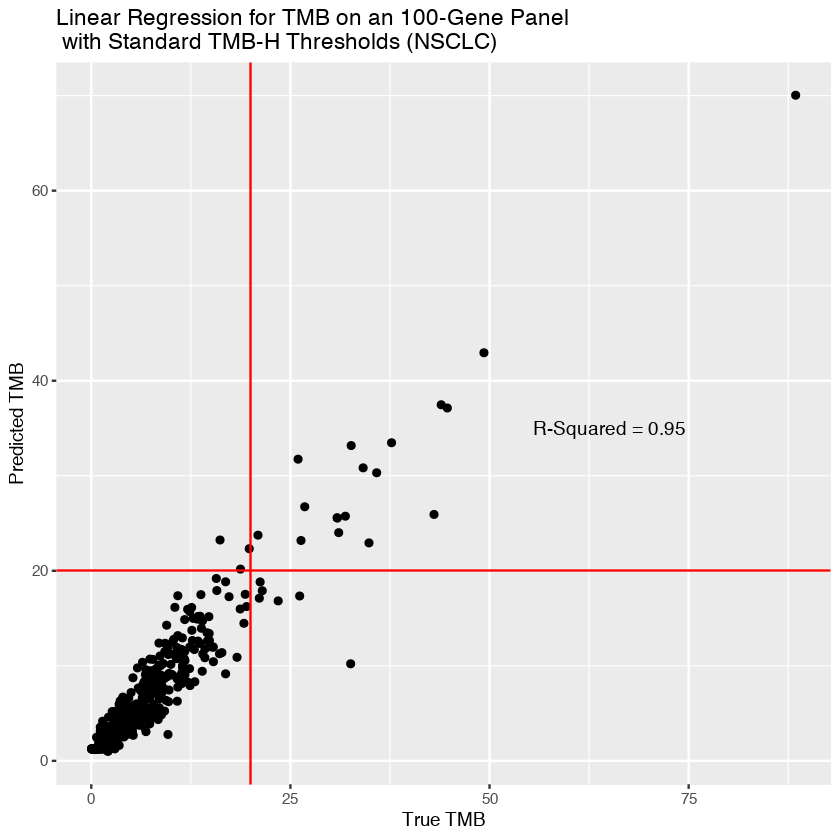

In [289]:
testModel(my_model, get_gene_matrix(lung_data[["test_data"]], genes_by_p), type = "W") %>% 
    ggplot(aes(x = actual, y = prediction)) + geom_point() + geom_vline(xintercept = 20, colour = "red") + 
    geom_hline(yintercept = 20, colour = "red") + labs(title = "Linear Regression for TMB on an 100-Gene Panel \n with Standard TMB-H Thresholds (NSCLC)", x = "True TMB",
    y = "Predicted TMB") + annotate("text", label = "R-Squared = 0.95", x = 65, y = 35)

# testModel(my_f_model, get_gene_matrix(lung_data[["test_data"]], genes_by_p), type = "W") %>% 
#     ggplot(aes(x = actual, y = prediction)) + geom_point() + geom_vline(xintercept = 20, colour = "red") + 
#     geom_hline(yintercept = 20, colour = "red") + ggtitle("Forest")

# testModel(my_svm_model, get_gene_matrix(lung_data[["test_data"]], genes_by_p), type = "W") %>% 
#     ggplot(aes(x = actual, y = prediction)) + geom_point() + geom_vline(xintercept = 20, colour = "red") + 
#     geom_hline(yintercept = 20, colour = "red") + ggtitle("Support Vector Machine")

### Collecting genes across cancer types

In [28]:
genes_3_pool <- gene_TMB_Calc(three_cancer_data[["training_data"]] %>% select(-cancer_type))

In [32]:
gene_pool <- get_gene_stats(genes_3_pool) %>% 
    arrange(desc(p_val_rank)) %>% 
    pull(Hugo_Symbol) %>% 
    {.[1:100]}

In [41]:
lin_3_pool_mod <- get_gene_model(gene_pool, three_cancer_data[["training_data"]] %>% select(-cancer_type))
rf_3_pool_mod <- get_gene_f_model(gene_pool, three_cancer_data[["training_data"]] %>% select(-cancer_type))
svm_3_pool_mod <- get_gene_svm_model(gene_pool, three_cancer_data[["training_data"]] %>% select(-cancer_type))

In [44]:
message("Cmin")
by_cancer_test(lin_3_pool_mod, three_cancer_data, genes = gene_pool, type = "Cmin")

by_cancer_test(rf_3_pool_mod, three_cancer_data, genes = gene_pool, type = "Cmin")

by_cancer_test(svm_3_pool_mod, three_cancer_data, genes = gene_pool, type = "Cmin")

message("R squared")
by_cancer_test(lin_3_pool_mod, three_cancer_data, genes = gene_pool, type = "R")

by_cancer_test(rf_3_pool_mod, three_cancer_data, genes = gene_pool, type = "R")

by_cancer_test(svm_3_pool_mod, three_cancer_data, genes = gene_pool, type = "R")

Cmin


cancer_type,stats,test_train
lusc,0.8214286,training_data
nsclc,0.5645161,training_data
skcm,0.8082902,training_data
lusc,0.1428571,test_data
nsclc,0.3913043,test_data
skcm,0.7582418,test_data


cancer_type,stats,test_train
lusc,0.8571429,training_data
nsclc,0.7903226,training_data
skcm,0.880829,training_data
lusc,0.1428571,test_data
nsclc,0.2608696,test_data
skcm,0.8461538,test_data


cancer_type,stats,test_train
lusc,0.7857143,training_data
nsclc,0.8225806,training_data
skcm,0.880829,training_data
lusc,0.7142857,test_data
nsclc,0.4782609,test_data
skcm,0.7438017,test_data


R squared


cancer_type,stats,test_train
lusc,0.8251447,training_data
nsclc,0.9284024,training_data
skcm,0.9128511,training_data
lusc,0.5663092,test_data
nsclc,0.8482173,test_data
skcm,0.9723194,test_data


cancer_type,stats,test_train
lusc,0.989739,training_data
nsclc,0.9921122,training_data
skcm,0.9477987,training_data
lusc,0.7954101,test_data
nsclc,0.9016779,test_data
skcm,0.8341943,test_data


cancer_type,stats,test_train
lusc,0.958892,training_data
nsclc,0.9725854,training_data
skcm,0.8418284,training_data
lusc,0.6520916,test_data
nsclc,0.8969259,test_data
skcm,0.3790554,test_data


In [35]:
joins <- function(x, y) {
    return(sum(x %in% y))
}

In [40]:
joins(gene_pool, genes_3)

[1] 33

In [16]:
gene_3_p <- by_cancer_gene_stats(three_cancer_data[["training_data"]], 3, report = TRUE)
genes_3 <- gene_3_p[[1]] %>% 
    arrange(desc(p_val_rank)) %>% 
    pull(Hugo_Symbol) %>% 
    {.[1:100]}
write_rds(gene_3_p, "/Users/jacobbradley/Documents/CCG/Data/gene_3_p")

Calculating global tmbs
Attaching samplewise data
Calculating local mutation burdens
Compiling gene-wise local vs global tmbs
Computing p_values
Calculating global tmbs
Attaching samplewise data
Calculating local mutation burdens
Compiling gene-wise local vs global tmbs
Computing p_values
Calculating global tmbs
Attaching samplewise data
Calculating local mutation burdens
Compiling gene-wise local vs global tmbs
Computing p_values


In [17]:
lin_mod <- get_gene_model(genes_3, lung_data[["training_data"]])
rf_mod <- get_gene_f_model(genes_3, lung_data[["training_data"]])
svm_mod <- get_gene_svm_model(genes_3, lung_data[["training_data"]])

Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”

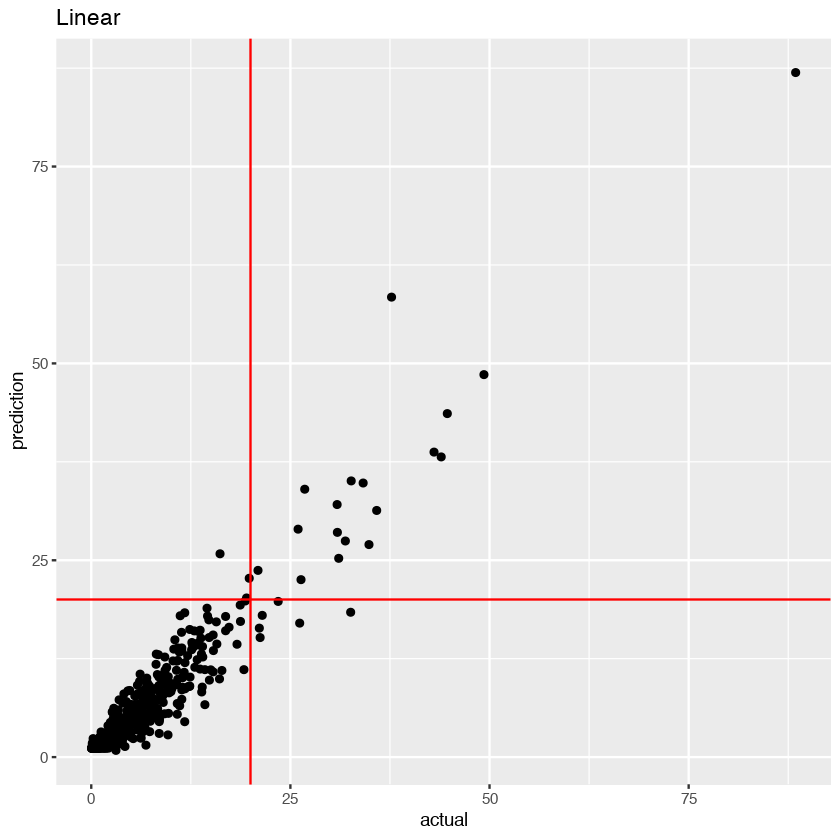

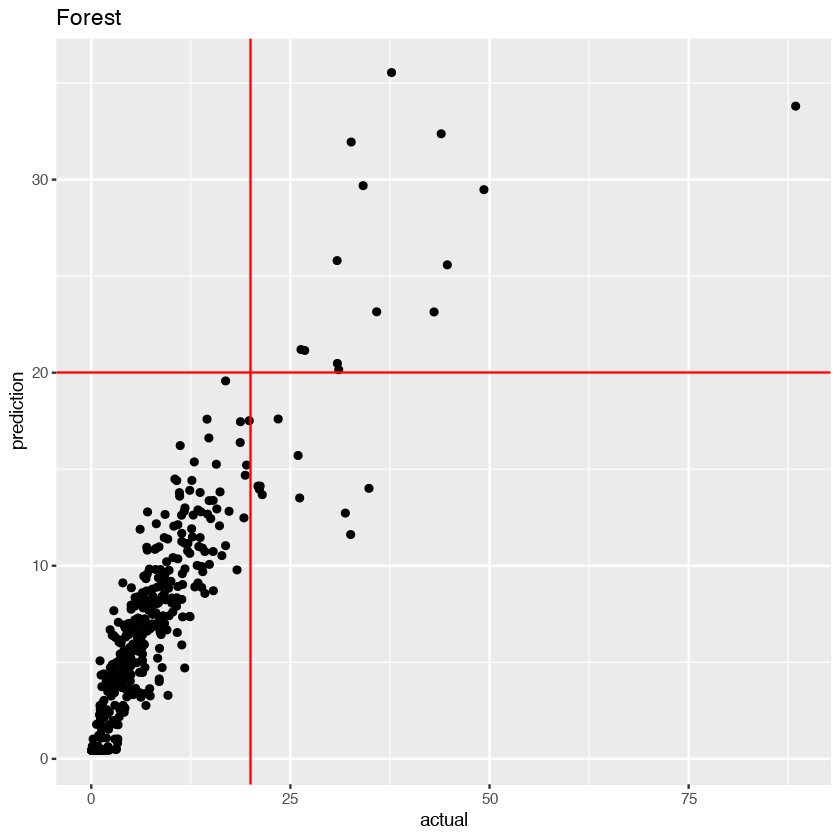

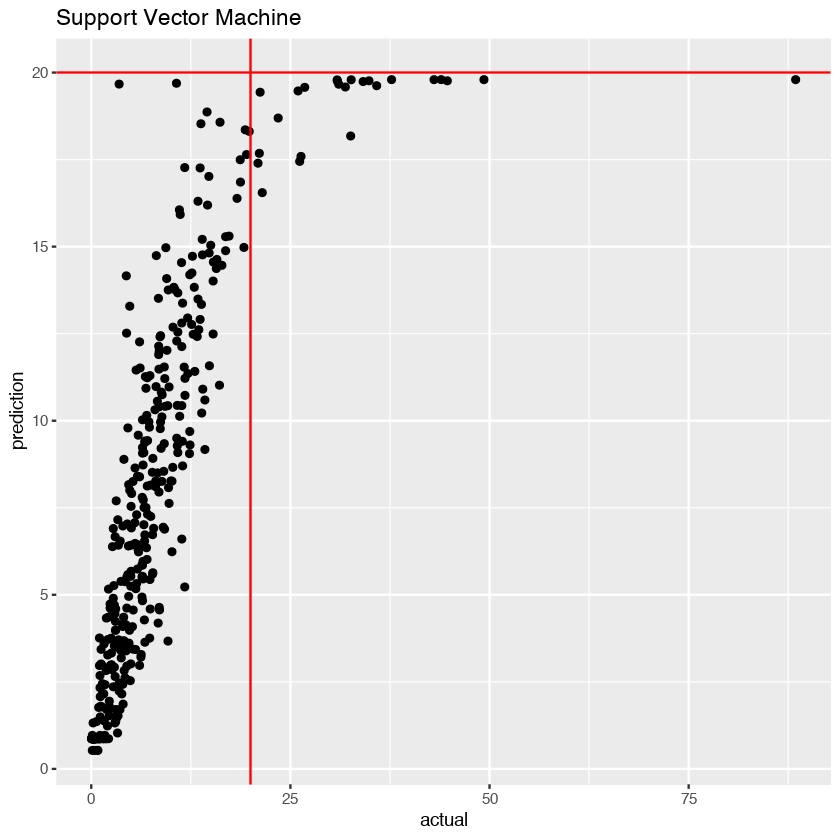

In [18]:
testModel(lin_mod, get_gene_matrix(lung_data[["test_data"]], genes_3), type = "W") %>% 
    ggplot(aes(x = actual, y = prediction)) + geom_point() + geom_vline(xintercept = 20, colour = "red") + 
    geom_hline(yintercept = 20, colour = "red") + ggtitle("Linear")
testModel(rf_mod, get_gene_matrix(lung_data[["test_data"]], genes_3), type = "W") %>% 
    ggplot(aes(x = actual, y = prediction)) + geom_point() + geom_vline(xintercept = 20, colour = "red") + 
    geom_hline(yintercept = 20, colour = "red") + ggtitle("Forest")
testModel(svm_mod, get_gene_matrix(lung_data[["test_data"]], genes_3), type = "W") %>% 
    ggplot(aes(x = actual, y = prediction)) + geom_point() + geom_vline(xintercept = 20, colour = "red") + 
    geom_hline(yintercept = 20, colour = "red") + ggtitle("Support Vector Machine")

In [19]:
message("Cmin")
by_cancer_test(lin_mod, three_cancer_data, genes = genes_3, type = "Cmin")

by_cancer_test(rf_mod, three_cancer_data, genes = genes_3, type = "Cmin")

by_cancer_test(svm_mod, three_cancer_data, genes = genes_3, type = "Cmin")

message("R squared")
by_cancer_test(lin_mod, three_cancer_data, genes = genes_3, type = "R")

by_cancer_test(rf_mod, three_cancer_data, genes = genes_3, type = "R")

by_cancer_test(svm_mod, three_cancer_data, genes = genes_3, type = "R")

Cmin
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”

cancer_type,stats,test_train
lusc,0.8928571,training_data
nsclc,0.8387097,training_data
skcm,0.7349624,training_data
lusc,0.4285714,test_data
nsclc,0.7391304,test_data
skcm,0.7355372,test_data


cancer_type,stats,test_train
lusc,0.7857143,training_data
nsclc,0.7580645,training_data
skcm,0.8031088,training_data
lusc,0.1428571,test_data
nsclc,0.7391304,test_data
skcm,0.8636364,test_data


cancer_type,stats,test_train
lusc,0.25,training_data
nsclc,0.7096774,training_data
skcm,0,training_data
lusc,0,test_data
nsclc,0.5217391,test_data
skcm,0,test_data


R squared
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”

cancer_type,stats,test_train
lusc,0.7581332,training_data
nsclc,0.9688782,training_data
skcm,0.8561438,training_data
lusc,0.6952628,test_data
nsclc,0.9318541,test_data
skcm,0.9735792,test_data


cancer_type,stats,test_train
lusc,0.869115,training_data
nsclc,0.9558968,training_data
skcm,0.795367,training_data
lusc,0.6810143,test_data
nsclc,0.9416497,test_data
skcm,0.6177984,test_data


cancer_type,stats,test_train
lusc,0.5446573,training_data
nsclc,0.8983342,training_data
skcm,0.4262749,training_data
lusc,0.4862114,test_data
nsclc,0.9118609,test_data
skcm,0.2613627,test_data


In [20]:
lin_3_mod <- get_gene_model(genes_3, three_cancer_data[["training_data"]] %>% select(-cancer_type))
rf_3_mod <- get_gene_f_model(genes_3, three_cancer_data[["training_data"]] %>% select(-cancer_type))
svm_3_mod <- get_gene_svm_model(genes_3, three_cancer_data[["training_data"]] %>% select(-cancer_type))

In [21]:
message("Cmin")
by_cancer_test(lin_3_mod, three_cancer_data, genes = genes_3, type = "Cmin")

by_cancer_test(rf_3_mod, three_cancer_data, genes = genes_3, type = "Cmin")

by_cancer_test(svm_3_mod, three_cancer_data, genes = genes_3, type = "Cmin")

message("R squared")
by_cancer_test(lin_3_mod, three_cancer_data, genes = genes_3, type = "R")

by_cancer_test(rf_3_mod, three_cancer_data, genes = genes_3, type = "R")

by_cancer_test(svm_3_mod, three_cancer_data, genes = genes_3, type = "R")

Cmin


cancer_type,stats,test_train
lusc,0.7142857,training_data
nsclc,0.6451613,training_data
skcm,0.7875648,training_data
lusc,0.1428571,test_data
nsclc,0.3913043,test_data
skcm,0.8461538,test_data


cancer_type,stats,test_train
lusc,0.8571429,training_data
nsclc,0.8064516,training_data
skcm,0.880829,training_data
lusc,0.1428571,test_data
nsclc,0.3043478,test_data
skcm,0.8351648,test_data


cancer_type,stats,test_train
lusc,0.9642857,training_data
nsclc,0.8709677,training_data
skcm,0.9222798,training_data
lusc,0.2857143,test_data
nsclc,0.6086957,test_data
skcm,0.7479339,test_data


R squared


cancer_type,stats,test_train
lusc,0.8831981,training_data
nsclc,0.9234377,training_data
skcm,0.9140481,training_data
lusc,0.6357636,test_data
nsclc,0.8634687,test_data
skcm,0.9685444,test_data


cancer_type,stats,test_train
lusc,0.9896092,training_data
nsclc,0.9920031,training_data
skcm,0.9473869,training_data
lusc,0.7998517,test_data
nsclc,0.9139983,test_data
skcm,0.838069,test_data


cancer_type,stats,test_train
lusc,0.9496768,training_data
nsclc,0.970129,training_data
skcm,0.841514,training_data
lusc,0.5989997,test_data
nsclc,0.9234071,test_data
skcm,0.3803096,test_data


In [22]:
lin_3l_mod <- get_gene_model(genes_by_p, three_cancer_data[["training_data"]] %>% select(-cancer_type))
rf_3l_mod <- get_gene_f_model(genes_by_p, three_cancer_data[["training_data"]] %>% select(-cancer_type))
svm_3l_mod <- get_gene_svm_model(genes_by_p, three_cancer_data[["training_data"]] %>% select(-cancer_type))

In [56]:
message("Cmin")
by_cancer_test(lin_3l_mod, three_cancer_data, genes = genes_by_p, type = "Cmin")

by_cancer_test(rf_3l_mod, three_cancer_data, genes = genes_by_p, type = "Cmin")

by_cancer_test(svm_3l_mod, three_cancer_data, genes = genes_by_p, type = "Cmin")

message("R squared")
by_cancer_test(lin_3l_mod, three_cancer_data, genes = genes_by_p, type = "R")

by_cancer_test(rf_3l_mod, three_cancer_data, genes = genes_by_p, type = "R")

by_cancer_test(svm_3l_mod, three_cancer_data, genes = genes_by_p, type = "R")

Cmin


cancer_type,stats,test_train
lusc,0.75,training_data
nsclc,0.6612903,training_data
skcm,0.7823834,training_data
lusc,0.5714286,test_data
nsclc,0.6086957,test_data
skcm,0.7912088,test_data


cancer_type,stats,test_train
lusc,0.8571429,training_data
nsclc,0.8225806,training_data
skcm,0.8756477,training_data
lusc,0.5714286,test_data
nsclc,0.4782609,test_data
skcm,0.8351648,test_data


cancer_type,stats,test_train
lusc,0.8928571,training_data
nsclc,0.9516129,training_data
skcm,0.8860104,training_data
lusc,0.4285714,test_data
nsclc,0.6521739,test_data
skcm,0.8305785,test_data


R squared


cancer_type,stats,test_train
lusc,0.867058,training_data
nsclc,0.9405514,training_data
skcm,0.9168774,training_data
lusc,0.6324088,test_data
nsclc,0.9067145,test_data
skcm,0.97354,test_data


cancer_type,stats,test_train
lusc,0.9903283,training_data
nsclc,0.9931906,training_data
skcm,0.9472986,training_data
lusc,0.7942899,test_data
nsclc,0.9262886,test_data
skcm,0.8326924,test_data


cancer_type,stats,test_train
lusc,0.9646355,training_data
nsclc,0.9739115,training_data
skcm,0.8411558,training_data
lusc,0.6298017,test_data
nsclc,0.9341869,test_data
skcm,0.3982816,test_data


### classification

In [112]:
by_cancer_test <- function(model, data, genes, class = FALSE, type = "R", threshold = 20) {
    training_data <- data[["training_data"]] %>% 
        group_by(cancer_type) %>% 
        nest()
    
    test_data <- data[["test_data"]] %>% 
        group_by(cancer_type) %>% 
        nest()
    

    
    training_data <- training_data %>%
        mutate(data = map(data, ~get_gene_matrix(.x, gene_list = genes))) 
    test_data <- test_data %>% 
        mutate(data = map(data, ~get_gene_matrix(.x, gene_list = genes)))
    
    if (class) {
        training_data <- training_data %>% 
            mutate(data = map(data, function(data) mutate(data, TMB = threshold*as.integer(TMB >= threshold)))) 
        test_data <- test_data %>% 
            mutate(data = map(data, function(data) mutate(data, TMB = threshold*as.integer(TMB >= threshold))))
    }
                      
    training_data <- training_data %>% 
        mutate(stats = map(data, ~testModel(model, .x, class, type, threshold))) %>% 
        select(-data) %>% 
        mutate(test_train = "training_data")
    
    test_data <- test_data %>% 
        mutate(stats = map(data, ~testModel(model, .x, class, type, threshold))) %>% 
        select(-data) %>% 
        mutate(test_train = "test_data")
    
    return(bind_rows(training_data, test_data))    
    
} 

### Analysing Panel Size

In [220]:
sizes <- seq(10,140,10)
data <- lung_data
test_type <- "R"
gene_stats <- gene_TMB_Calc(data[["training_data"]]) %>% 
    get_gene_stats()

In [221]:
stats <- analyse_gene_panel_size(sizes, gene_stats, data, test_type)

Panel size 10
making models
linear
random forest
svm
testing models
Panel size 20
making models
linear
random forest
svm
testing models
Panel size 30
making models
linear
random forest
svm
testing models
Panel size 40
making models
linear
random forest
svm
testing models
Panel size 50
making models
linear
random forest
svm
testing models
Panel size 60
making models
linear
random forest
svm
testing models
Panel size 70
making models
linear
random forest
svm
testing models
Panel size 80
making models
linear
random forest
svm
testing models
Panel size 90
making models
linear
random forest
svm
testing models
Panel size 100
making models
linear
random forest
svm
testing models
Panel size 110
making models
linear
random forest
svm
testing models
Panel size 120
making models
linear
random forest
svm
testing models
Panel size 130
making models
linear
random forest
svm
testing models
Panel size 140
making models
linear
random forest
svm
testing models


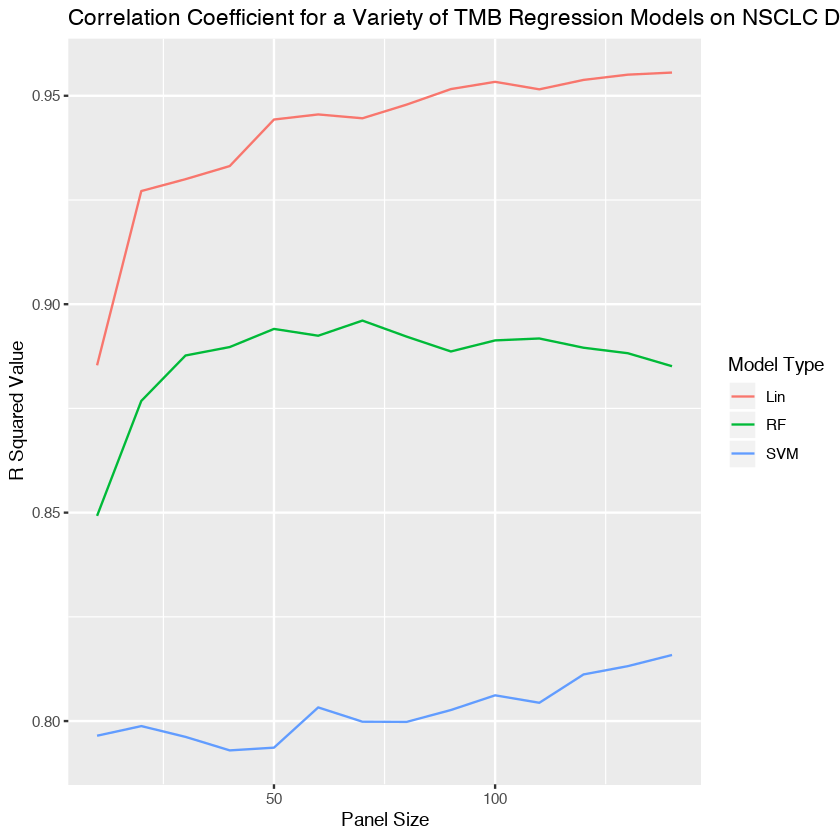

In [283]:
stats %>% 
    ggplot(aes(x = panel_size, y = stat, colour = model_type)) + geom_line() +
    labs(title = "Correlation Coefficient for a Variety of TMB Regression Models on NSCLC Data",
        colour = "Model Type", x = "Panel Size", y = "R Squared Value")

In [250]:
stats_c <- analyse_gene_panel_size(sizes, gene_stats, data, test_type = "C")


Panel size 10
making models
linear
random forest
svm
testing models
Panel size 20
making models
linear
random forest
svm
testing models
Panel size 30
making models
linear
random forest
svm
testing models
Panel size 40
making models
linear
random forest
svm
testing models
Panel size 50
making models
linear
random forest
svm
testing models
Panel size 60
making models
linear
random forest
svm
testing models
Panel size 70
making models
linear
random forest
svm
testing models
Panel size 80
making models
linear
random forest
svm
testing models
Panel size 90
making models
linear
random forest
svm
testing models
Panel size 100
making models
linear
random forest
svm
testing models
Panel size 110
making models
linear
random forest
svm
testing models
Panel size 120
making models
linear
random forest
svm
testing models
Panel size 130
making models
linear
random forest
svm
testing models
Panel size 140
making models
linear
random forest
svm
testing models


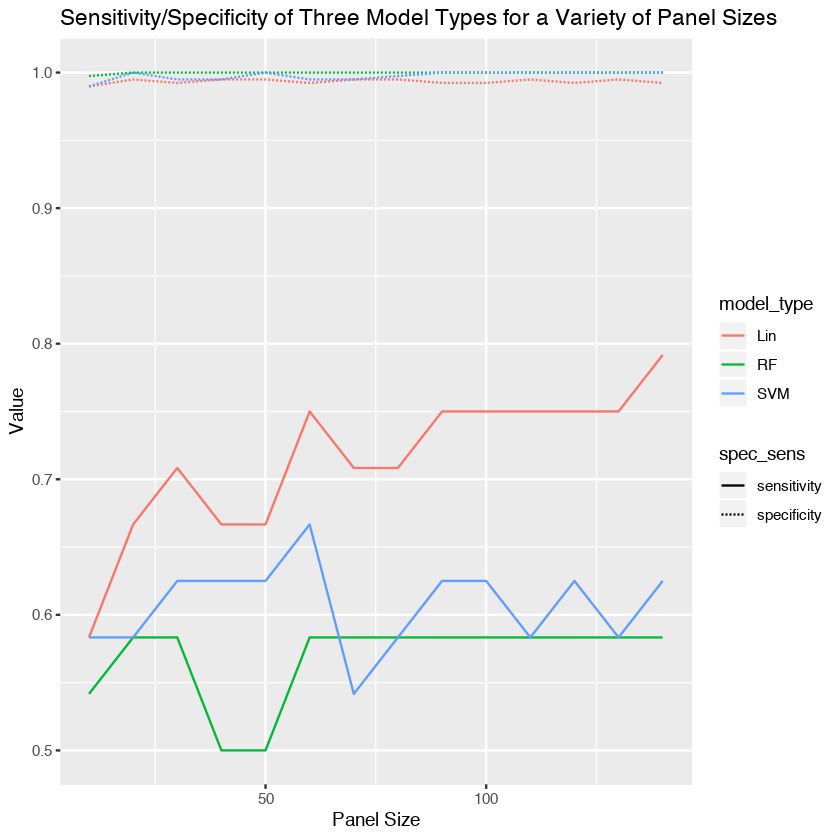

In [322]:
stats_c  %>% 
    ggplot(aes(x = panel_size, y = stat, colour = model_type, linetype = spec_sens)) +
    geom_line() + labs(title = "Sensitivity/Specificity of Three Model Types for a Variety of Panel Sizes",
                      x = "Panel Size", y = "Value")

In [251]:
stats_auc <- analyse_gene_panel_size(sizes, gene_stats, data, test_type = "AUC")


Panel size 10
making models
linear
random forest
svm
testing models
Panel size 20
making models
linear
random forest
svm
testing models
Panel size 30
making models
linear
random forest
svm
testing models
Panel size 40
making models
linear
random forest
svm
testing models
Panel size 50
making models
linear
random forest
svm
testing models
Panel size 60
making models
linear
random forest
svm
testing models
Panel size 70
making models
linear
random forest
svm
testing models
Panel size 80
making models
linear
random forest
svm
testing models
Panel size 90
making models
linear
random forest
svm
testing models
Panel size 100
making models
linear
random forest
svm
testing models
Panel size 110
making models
linear
random forest
svm
testing models
Panel size 120
making models
linear
random forest
svm
testing models
Panel size 130
making models
linear
random forest
svm
testing models
Panel size 140
making models
linear
random forest
svm
testing models


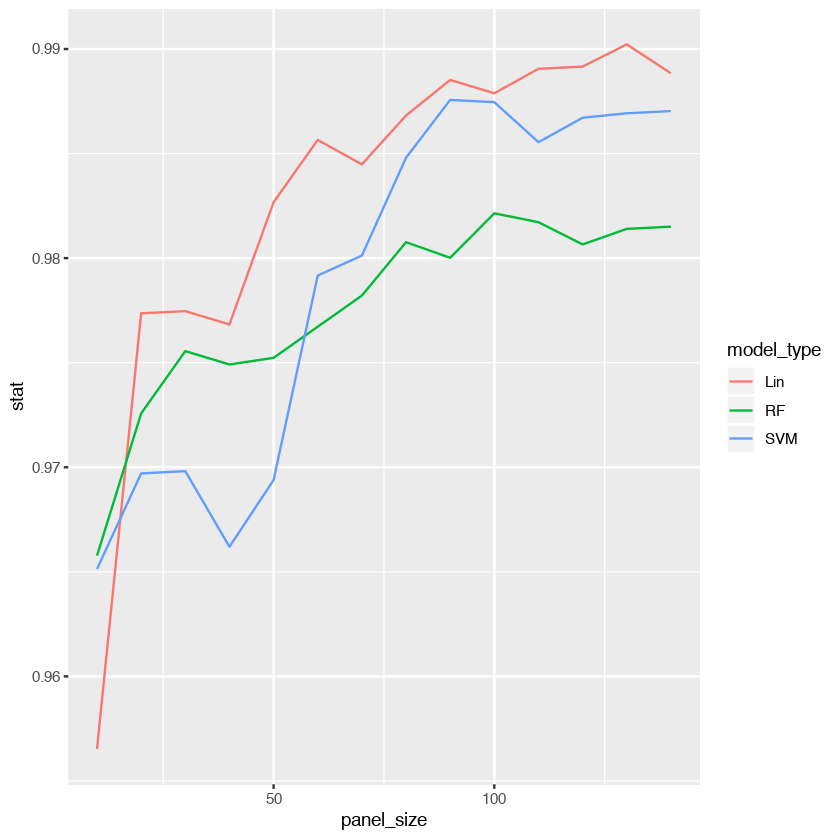

In [255]:
stats_auc  %>% 
    ggplot(aes(x = panel_size, y = stat, colour = model_type)) +
    geom_line()

### ROC and AUC

In [219]:
devtools::install_github("sachsmc/plotROC")
library(plotROC)


BH         (1.66.0-1 -> 1.69.0-1) [CRAN]
colorspace (1.3-2    -> 1.4-0   ) [CRAN]
gridSVG    (NA       -> 1.6-0   ) [CRAN]
httpuv     (1.4.5    -> 1.4.5.1 ) [CRAN]
jsonlite   (1.5      -> 1.6     ) [CRAN]
pillar     (1.3.0    -> 1.3.1   ) [CRAN]
rlang      (0.3.0.1  -> 0.3.1   ) [CRAN]
tibble     (1.4.2    -> 2.0.1   ) [CRAN]


Installing 8 packages: BH, colorspace, gridSVG, httpuv, jsonlite, pillar, rlang, tibble



The downloaded binary packages are in
	/var/folders/g9/9x6m35fn5ydf88vdlm9n1vg80000gn/T//RtmppWz4sn/downloaded_packages
✔  checking for file ‘/private/var/folders/g9/9x6m35fn5ydf88vdlm9n1vg80000gn/T/RtmppWz4sn/remotes28c33f9609d/sachsmc-plotROC-1815898/DESCRIPTION’ (595ms)
─  preparing ‘plotROC’:
✔  checking DESCRIPTION meta-information ...
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘plotROC_2.2.1.tar.gz’
   


In [271]:
lin_model <- get_gene_model(genes_by_p[1:40], data[["training_data"]])
 rf_model <- get_gene_f_model(genes_by_p[1:40], data[["training_data"]])
svm_model <- get_gene_svm_model(genes_by_p[1:40], data[["training_data"]])


In [272]:
models <- list(lin_model, rf_model, svm_model)

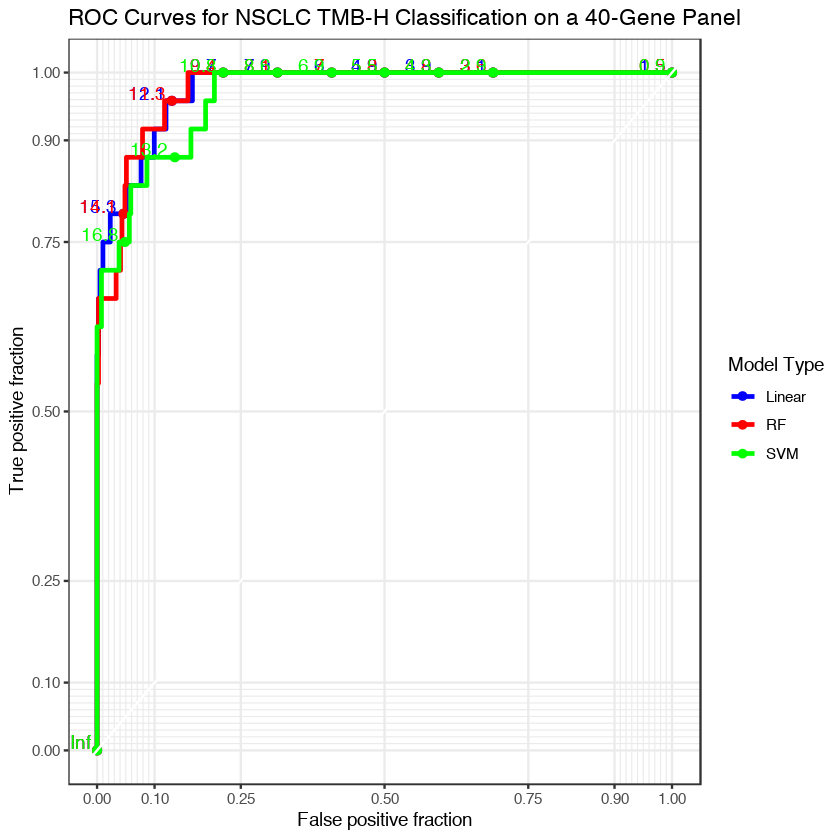

In [279]:
get_roc(models, data[["test_data"]], genes_by_p[1:40]) + style_roc() +
    scale_color_manual(labels = c("Linear", "RF", "SVM"), values = c("blue", "red", "green")) +
    labs(title = "ROC Curves for NSCLC TMB-H Classification on a 40-Gene Panel", colour = "Model Type")


### Balacing Datasets

In [25]:
balance_data <- function(data, threshold = 20) {
    above_threshold <- TMB_Calc(data)  %>% 
        filter(TMB >= threshold) %>% 
        pull(Tumor_Sample_Barcode)
    
    below_threshold <- TMB_Calc(data) %>% 
        filter(TMB < threshold) %>% 
        pull(Tumor_Sample_Barcode)
    
    below_threshold <- sample(below_threshold, length(above_threshold))
    
    chosen_ones <- c(above_threshold, below_threshold)
    
    data <- data %>% 
        filter(Tumor_Sample_Barcode %in% chosen_ones)
    
    return(data)
    
}

In [310]:
balanced_data <- lung_data
balanced_data[["training_data"]] <- balance_data(lung_data[["training_data"]])

In [313]:
stats_bal_c <- analyse_gene_panel_size(seq(10,100,10), gene_stats, balanced_data, test_type = "C")


Panel size 10
making models
linear
random forest
svm
testing models
Panel size 20
making models
linear
random forest
svm
testing models
Panel size 30
making models
linear
random forest
svm
testing models
Panel size 40
making models
linear
random forest
svm
testing models
Panel size 50
making models
linear
random forest
svm
testing models
Panel size 60
making models
linear
random forest
svm
testing models
Panel size 70
making models
linear
random forest
svm
testing models
Panel size 80
making models
linear
random forest
svm
testing models
Panel size 90
making models
linear
random forest
svm
testing models
Panel size 100
making models
linear
random forest
svm
testing models


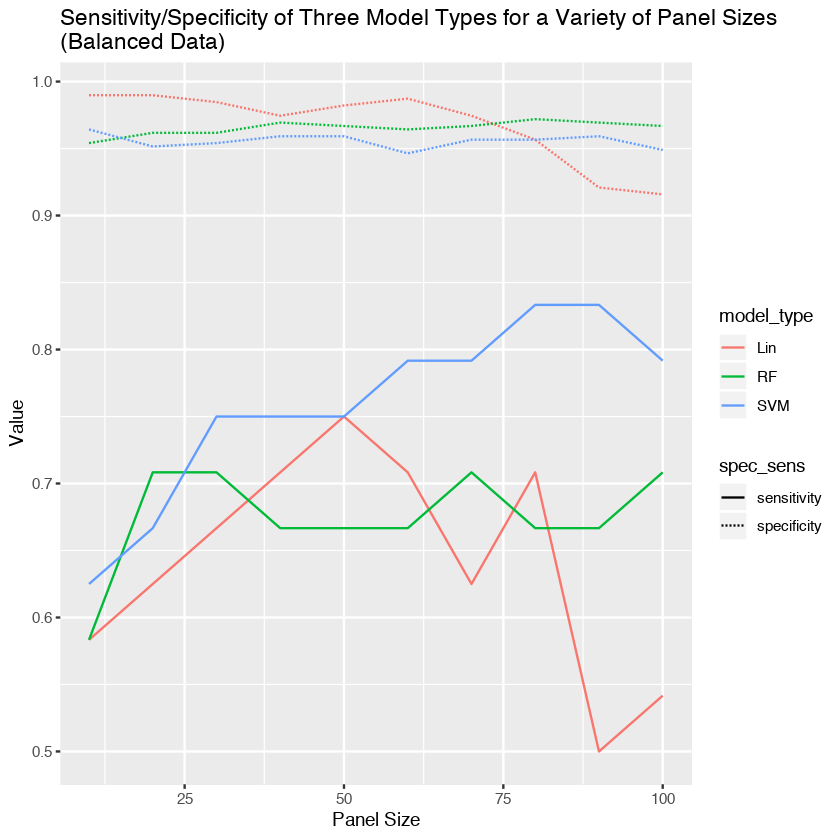

In [324]:
stats_bal_c  %>% 
    ggplot(aes(x = panel_size, y = stat, colour = model_type, linetype = spec_sens)) +
    geom_line() + labs(title = "Sensitivity/Specificity of Three Model Types for a Variety of Panel Sizes \n(Balanced Data)",
                      x = "Panel Size", y = "Value")

### Reintroducing Extra Data

In [317]:
data <- list()
data[["training_data"]] <- balance_data(three_cancer_data[["training_data"]])
data[["test_data"]] <- three_cancer_data[["test_data"]] %>% 
    filter(cancer_type == "nsclc") %>% 
    select(-cancer_type)


In [319]:
stats_bal_c_pool <- analyse_gene_panel_size(seq(10,100,10), gene_stats, data, test_type = "C")


Panel size 10
making models
linear
random forest
svm
testing models
Panel size 20
making models
linear
random forest
svm
testing models
Panel size 30
making models
linear
random forest
svm
testing models
Panel size 40
making models
linear
random forest
svm
testing models
Panel size 50
making models
linear
random forest
svm
testing models
Panel size 60
making models
linear
random forest
svm
testing models
Panel size 70
making models
linear
random forest
svm
testing models
Panel size 80
making models
linear
random forest
svm
testing models
Panel size 90
making models
linear
random forest
svm
testing models
Panel size 100
making models
linear
random forest
svm
testing models


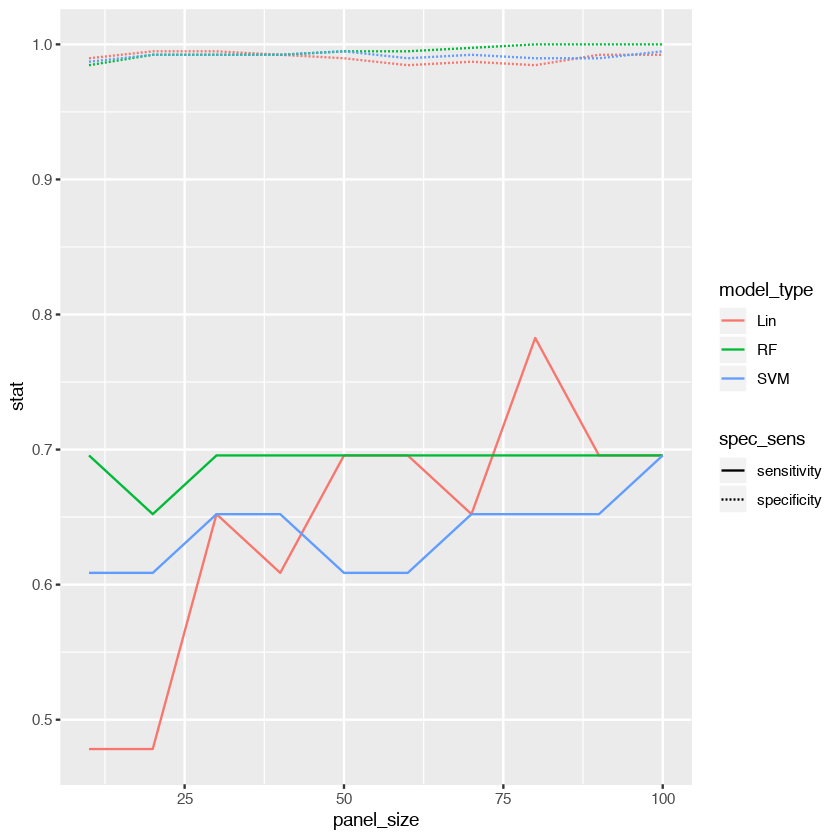

In [320]:
stats_bal_c_pool %>% 
    ggplot(aes(x = panel_size, y = stat, colour = model_type, linetype = spec_sens)) +
    geom_line()

Nope, wrong again...

In [321]:
genes_by_p

[1] "TTN"      "RYR2"     "MUC16"    "XIRP2"    "CSMD3"    "USH2A"   
  [7] "ZFHX4"    "FAT3"     "LRP1B"    "FLG"      "ZNF536"   "PCLO"    
 [13] "APOB"     "PAPPA2"   "UNC79"    "PCDH15"   "CACNA1E"  "DNAH9"   
 [19] "SPTA1"    "FBN2"     "RELN"     "SI"       "CUBN"     "ST6GAL2" 
 [25] "VCAN"     "TNR"      "NRXN1"    "ANK2"     "HRNR"     "PKHD1L1" 
 [31] "CNTNAP2"  "DNAH17"   "RYR3"     "SPHKAP"   "NAV3"     "ABCA13"  
 [37] "ADAMTS17" "HMCN1"    "OBSCN"    "AHNAK2"   "COL3A1"   "CSMD1"   
 [43] "ADAMTS12" "DOCK2"    "ASTN1"    "DNAH8"    "PKHD1"    "NLRP3"   
 [49] "THSD7A"   "UNC13C"   "SORCS1"   "LRP2"     "ASPM"     "SPEF2"   
 [55] "COL11A1"  "DNAH3"    "MYO18B"   "GPR112"   "RP1L1"    "TSHZ3"   
 [61] "MUC17"    "SVEP1"    "LPA"      "RYR1"     "IL21R"    "MMRN1"   
 [67] "COL5A2"   "CSMD2"    "SCN1A"    "DNAH11"   "MYO3A"    "GATA6"   
 [73] "DNAH5"    "SYNE2"    "CTNND2"   "LRRC7"    "TG"       "ASXL3"   
 [79] "FLG2"     "FCRL5"    "KCNH5"    "COL6A3"   "GPR158"   "PCDHA3"  
 [85] "OTOGL"    "TPR"      "ZNF831"   "DST"      "KIAA1211" "ITGA8"   
 [91] "SLC7A14"  "SEMA5A"   "ADAM18"   "NPAP1"    "DSCAM"    "MROH2B"  
 [97] "FAT4"     "COL22A1"  "ADAMTS20" "NRCAM"

### Looking at gene mutation frequency against significance

In [539]:
abridge <- function(maf_file, nonsilent = TRUE, by_study = FALSE, silent = FALSE) {
# Takes a maf file and selects the characteristics required to perform TMB analysis
# and removes duplicate entries (which exist for a variety of reasons, consult
# the TCGA website)
# Requires tidyverse
    
    if ("Start_position" %in% colnames(maf_file)) {
        maf_file <- mutate(maf_file, Start_Position = Start_position) %>%
            select(-Start_position)
    }
    
    if ("End_position" %in% colnames(maf_file)) {
        maf_file <- mutate(maf_file, End_Position = End_position) %>%
            select(-End_position)
    }
    
    chooses <- c("Hugo_Symbol", "Chromosome", "Start_Position", "End_Position", "Variant_Classification", "Variant_Type", "Tumor_Sample_Barcode")
    
    if (by_study) {
        chooses <- c(chooses, "study")
    }
   
    data_abridged <- maf_file %>% 
        dplyr::select(!!!chooses) %>% 
        distinct()
    

    if (nonsilent == TRUE) {
        data_abridged <- data_abridged %>% 
            filter(Variant_Classification %in% c('Frame_Shift_Del', 'Frame_Shift_Ins', 'In_Frame_Del', 'In_Frame_Ins', 'Missense_Mutation', 'Nonsense_Mutation', 'Nonstop_Mutation', 'Splice_Site', 'Translation_Start_Site'))
              }
    return(data_abridged)
}

In [540]:
cbio_getData <- function(path_name, cancer_type, by_cancer = FALSE, test = TRUE, training = 0.7, nonsilent = TRUE) {
    
    data <- tibble(Hugo_Symbol = character(), Chromosome = character(), 
                                 Start_Position = vector(), End_Position = vector(), 
                                 Variant_Classification = character(), Variant_Type = character(), 
                                 Tumor_Sample_Barcode = character(), study = character())
    
    for (i in 1:length(dir(path_name))) {
        
        if ("data_mutations_extended.txt" %in% dir(paste0(path_name, "/", dir(path_name)[i]))) {
            study_meta <- read_tsv(paste0(path_name, "/", dir(path_name)[i], "/meta_study.txt"), col_names = FALSE, comment = "#")
            cancer <- substr(study_meta[1,],17,nchar((study_meta[1,])))
            
            if (cancer %in% cancer_type) {
                print(dir(path_name)[i])
                new_data <- read_tsv(paste0(path_name, "/", dir(path_name)[i], "/data_mutations_extended.txt"), comment = "#") 
                if (all(substr(new_data$Chromosome, 1, 3) == "chr")) {
                    new_data$Chromosome <- substr(new_data$Chromosome, 4, 6)
                }
                if (all(!is.na(new_data$Chromosome))) {
                    new_data <- abridge(new_data, nonsilent)
                    print(new_data %>% 
                             count(Tumor_Sample_Barcode) %>% 
                             nrow())
                    new_data$Tumor_Sample_Barcode <- as.character(new_data$Tumor_Sample_Barcode) 
                    new_data$Chromosome <- as.character(new_data$Chromosome)

                    if (nrow(new_data) > 0) {
                        new_data$study <- dir(path_name)[i]
                        if (by_cancer) {
                            new_data$cancer_type <- cancer
                        }
                    }
                    data <- bind_rows(data, new_data) 
                   
                    data$Hugo_Symbol <- make.names(data$Hugo_Symbol)
                    
                }
            }
        }
    }
    print(data %>% 
             count(Tumor_Sample_Barcode) %>% 
             nrow())
    if (test == TRUE) {
        tumor_ids <- unique(data$Tumor_Sample_Barcode)
        
        training_sample <- sample(length(tumor_ids), floor(training*length(tumor_ids)))
        test_sample <- setdiff(1:length(tumor_ids), training_sample)
        print(length(training_sample))
        print(length(test_sample))
        training_ids <- tumor_ids[training_sample]
        test_ids <- tumor_ids[test_sample]
        
        training_data <- data %>% 
            filter(Tumor_Sample_Barcode %in% training_ids)
        test_data <- data %>% 
            filter(Tumor_Sample_Barcode %in% test_ids)
        
        out <- list(training_ids, test_ids, training_data, test_data)
        names(out) <- c("training_ids", "test_ids", "training_data", "test_data")
        return(out)
    }
    else {
        return(data)
    }
}

### Looking at gene size

In [32]:
BiocManager::install("biomaRt", version = "3.8")
library(biomaRt)
ensembl = useMart("ensembl", dataset = "hsapiens_gene_ensembl")

Bioconductor version 3.8 (BiocManager 1.30.3), R 3.5.1 (2018-07-02)
Installing package(s) 'biomaRt'
also installing the dependency ‘AnnotationDbi’




The downloaded binary packages are in
	/var/folders/g9/9x6m35fn5ydf88vdlm9n1vg80000gn/T//RtmpaeSagT/downloaded_packages


Update old packages: 'backports', 'BiocInstaller', 'BiocManager',
  'BiocParallel', 'Biostrings', 'biovizBase', 'broom', 'callr', 'checkmate',
  'circlize', 'class', 'clipr', 'clusterProfiler', 'codetools', 'cowplot',
  'curl', 'data.table', 'dbplyr', 'DESeq', 'DOSE', 'EDASeq', 'edgeR', 'ELMER',
  'ensembldb', 'foreign', 'gdsfmt', 'GenomicAlignments', 'GenomicFeatures',
  'gganimate', 'ggpubr', 'git2r', 'gplots', 'grImport', 'Gviz', 'haven',
  'Hmisc', 'htmlTable', 'httr', 'igraph', 'imager', 'IRdisplay', 'IRkernel',
  'jomo', 'knitr', 'later', 'lattice', 'limma', 'lme4', 'markdown', 'MASS',
  'Matrix', 'mclust', 'mgcv', 'mitml', 'modelr', 'openssl', 'pathview',
  'pbapply', 'processx', 'ps', 'purrr', 'quantreg', 'qvalue', 'RcppEigen',
  'readr', 'readxl', 'repr', 'rmarkdown', 'Rsamtools', 'rstudioapi',
  'rtracklayer', 'rvcheck', 'stringr', 'survival', 'sva', 'TCGAbiolinks',
  'tinytex', 'tweenr', 'units', 'urltools', 'VariantAnnotation', 'XML'


### Things we want to look at 

for each gene:

 - correlation with TMB (A)
 - p_val association with TMB (B)
 - gene length (C)
 - commonality of gene mutation (D)
 - silent mutation correlation (E)
 
Questions:

 - Is the ordering of (A) the same as (B)
 - Is (D/C) in correspondence with (A/sqrt(C))

In [10]:
lung_stats <- gene_TMB_Calc(lung_data[["training_data"]], get = c("p","c"), report = TRUE)

Calculating global tmbs
Attaching samplewise data
Calculating local mutation burdens
Compiling gene-wise local vs global tmbs


In [ ]:
lung_length_stats <- get_gene_lengths(lung_data[["training_data"]])

In [128]:
all_lung_stats <- lung_stats %>% 
    select(-data) %>% 
    full_join(lung_length_stats, by = "Hugo_Symbol")

In [264]:
# all_lung_stats$length <- unlist(all_lung_stats$length)
# all_lung_stats <- all_lung_stats %>% 
#     filter(!is.na(length))

write_rds(all_lung_stats, path = "/Users/jacobbradley/Documents/CCG/Data/all_lung_stats")
# all_lung_stats <- read_rds("/Users/jacobbradley/Documents/CCG/Data/all_lung_stats")

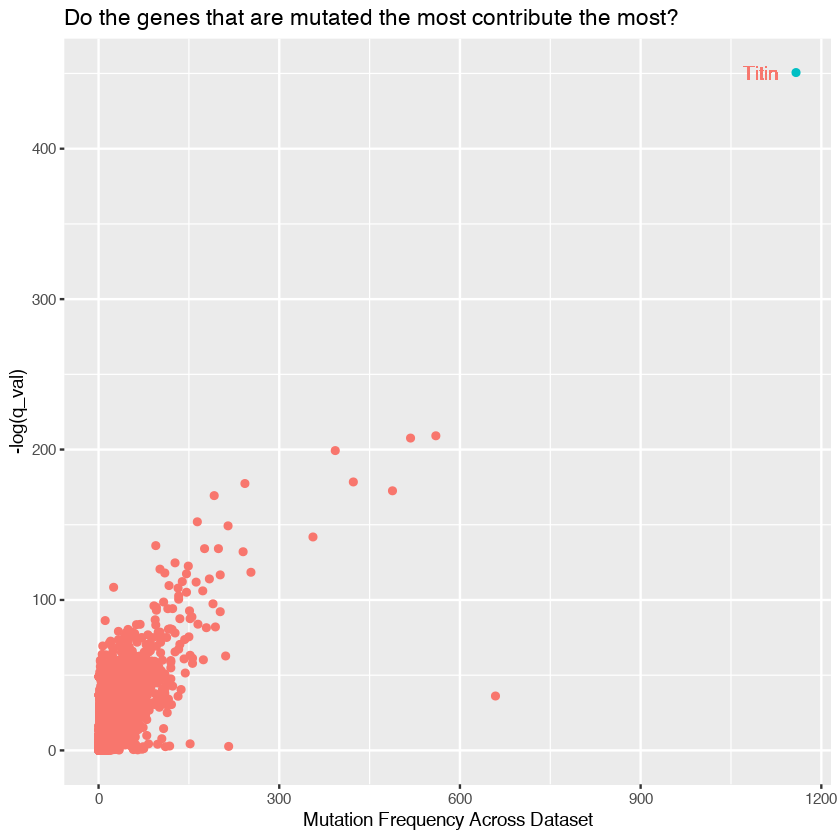

In [142]:
all_lung_stats %>% 
    ggplot(aes(x = n, y = -log(p_val), colour = Hugo_Symbol == "TTN")) + geom_point() + 
    labs(x = "Mutation Frequency Across Dataset", y = "-log(q_val)", 
         title = "Do the genes that are mutated the most contribute the most?") + 
    theme(legend.position = "none") + geom_text(aes(x = 1100, y = 450, label = "Titin"))

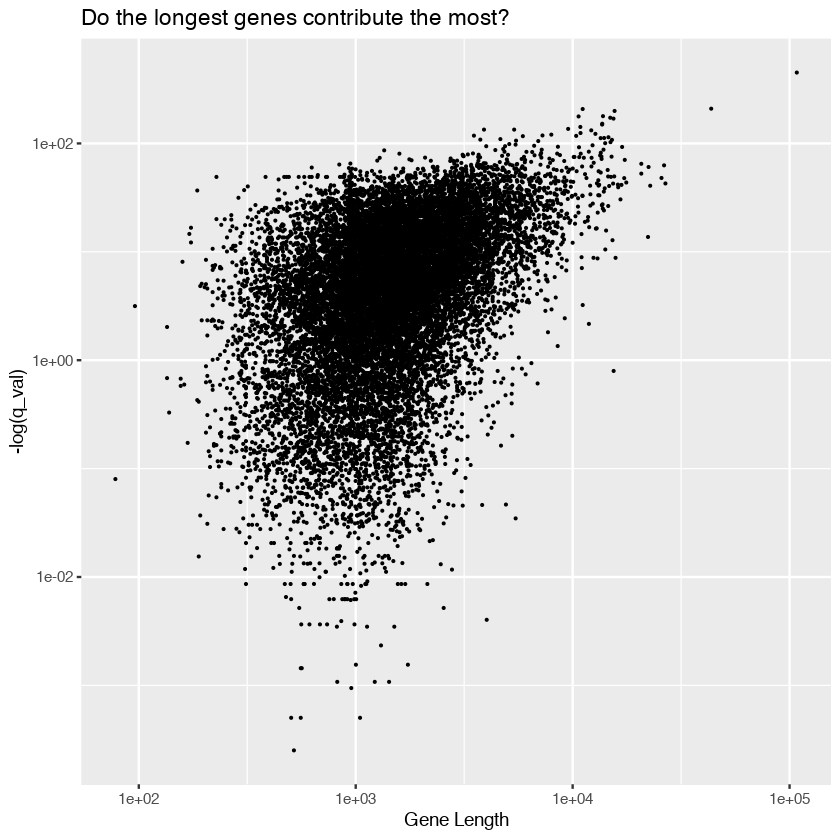

In [261]:
all_lung_stats %>% 
    ggplot(aes(x = length, y = -log(p_val))) + geom_point(size = 0.1) + scale_x_log10() + scale_y_log10() +
    labs(x = "Gene Length", y = "-log(q_val)", 
         title = "Do the longest genes contribute the most?") + theme(legend.position = "none") 

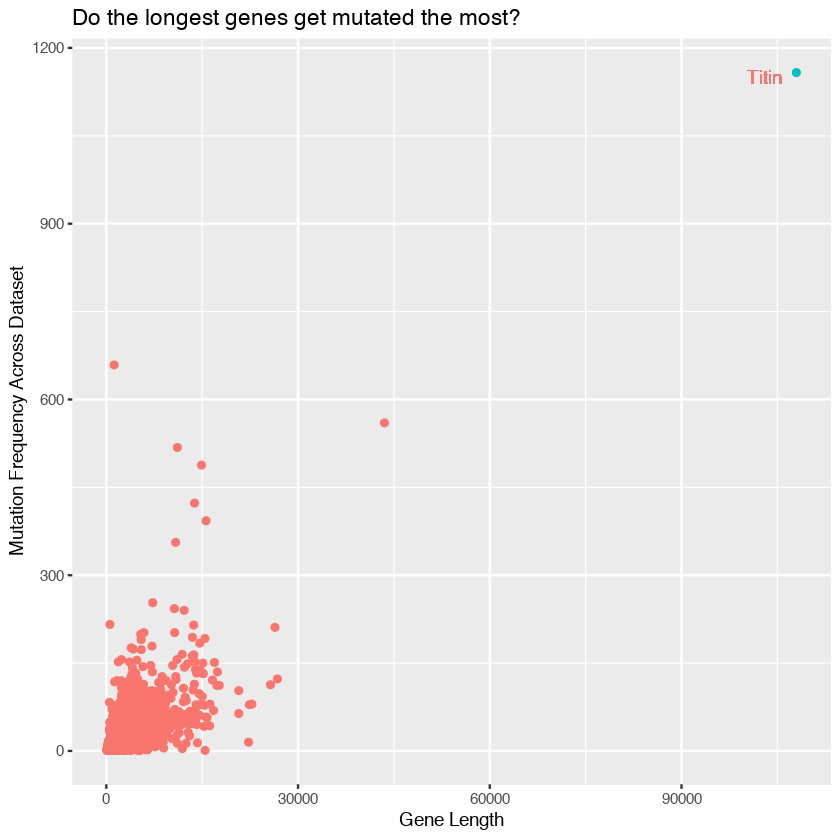

In [148]:
all_lung_stats %>% 
    ggplot(aes(x = length, y = n, colour = Hugo_Symbol == "TTN")) + geom_point() + 
    labs(x = "Gene Length", y = "Mutation Frequency Across Dataset", 
         title = "Do the longest genes get mutated the most?") + theme(legend.position = "none") +
    geom_text(aes(x = 103000, y = 1150, label = "Titin"))
    

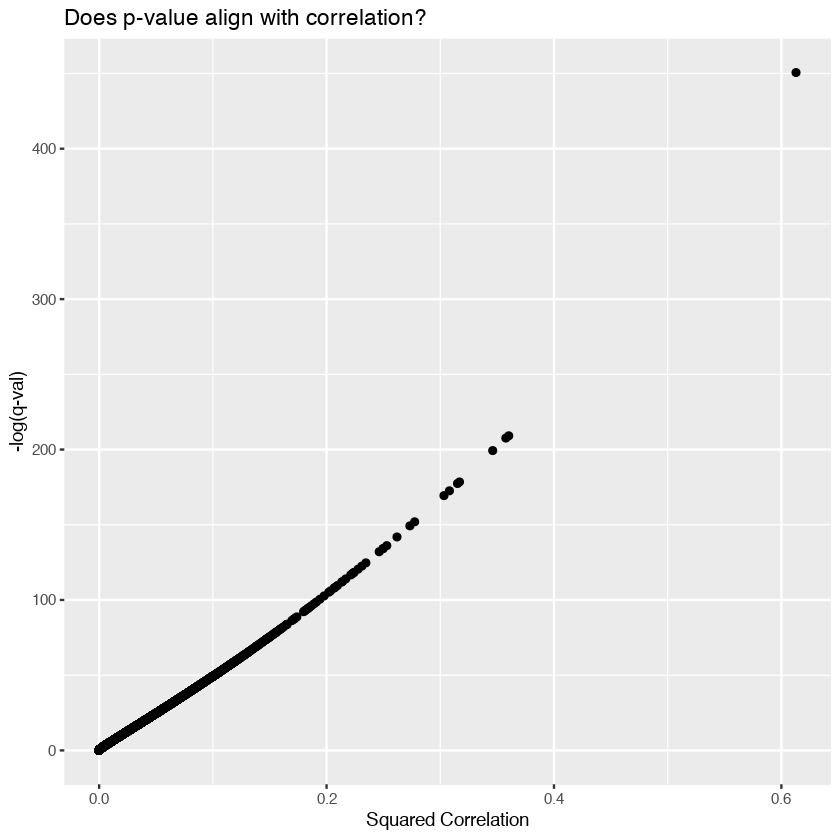

In [152]:
all_lung_stats %>% 
    ggplot(aes(x = cor^2, y = -log(p_val))) + geom_point() +
    labs(x = "Squared Correlation", y = "-log(q-val)",
        title = "Does p-value align with correlation?")

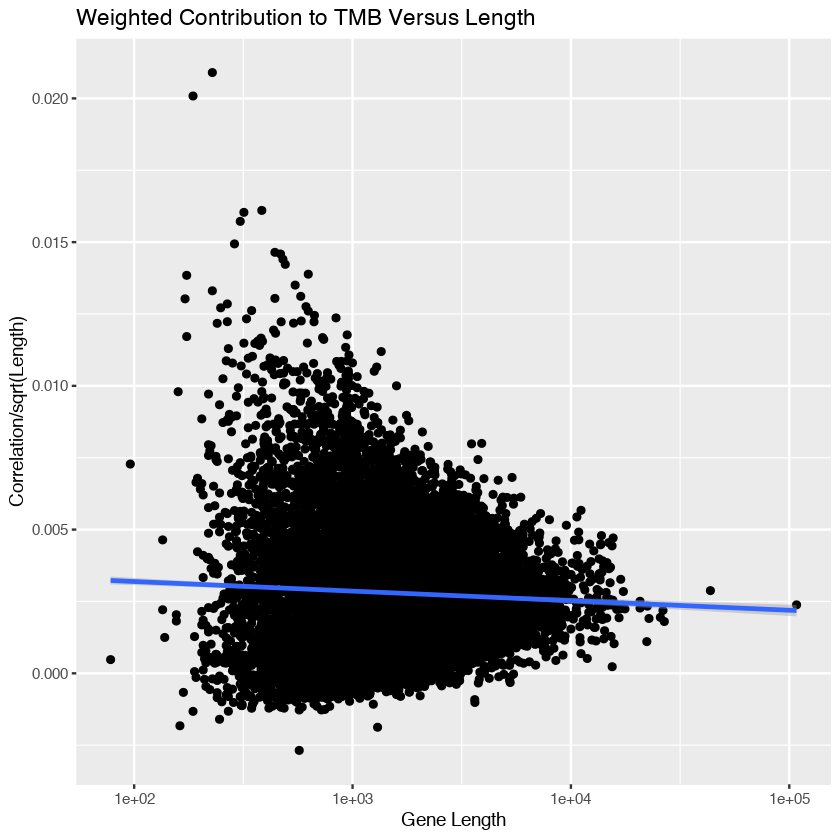

In [161]:
all_lung_stats %>% 
    ggplot(aes(x = length, y = cor/sqrt(length))) + geom_point() + scale_x_log10() +
    labs(title = "Weighted Contribution to TMB Versus Length", x = "Gene Length", y = "Correlation/sqrt(Length)") +
    geom_smooth(method = "lm")

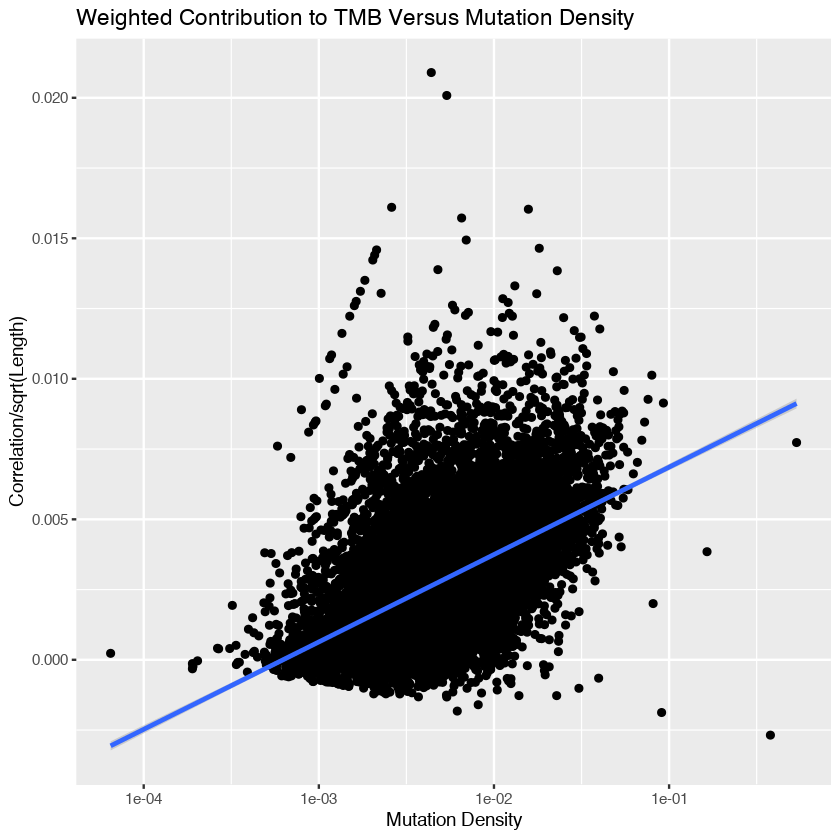

In [162]:
all_lung_stats %>% 
    ggplot(aes(x = n/length, y = cor/sqrt(length))) + geom_point() + scale_x_log10() +
    labs(title = "Weighted Contribution to TMB Versus Mutation Density", x = "Mutation Density", y = "Correlation/sqrt(Length)") + 
    geom_smooth(method = "lm")

In [213]:
panel_sizes <- seq(20000, 400000, 20000)

In [235]:
cor_sqrt_length_stats <- analyse_gene_panel_lengths(lung_data, panel_sizes, method_cor_over_sqrt_length, all_lung_stats)
p_length_stats <- analyse_gene_panel_lengths(lung_data, panel_sizes, method_p_over_length, all_lung_stats)
cor_length_n_stats <- analyse_gene_panel_lengths(lung_data, panel_sizes, method_cor_length_n, all_lung_stats)

[1] 20


1
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”2


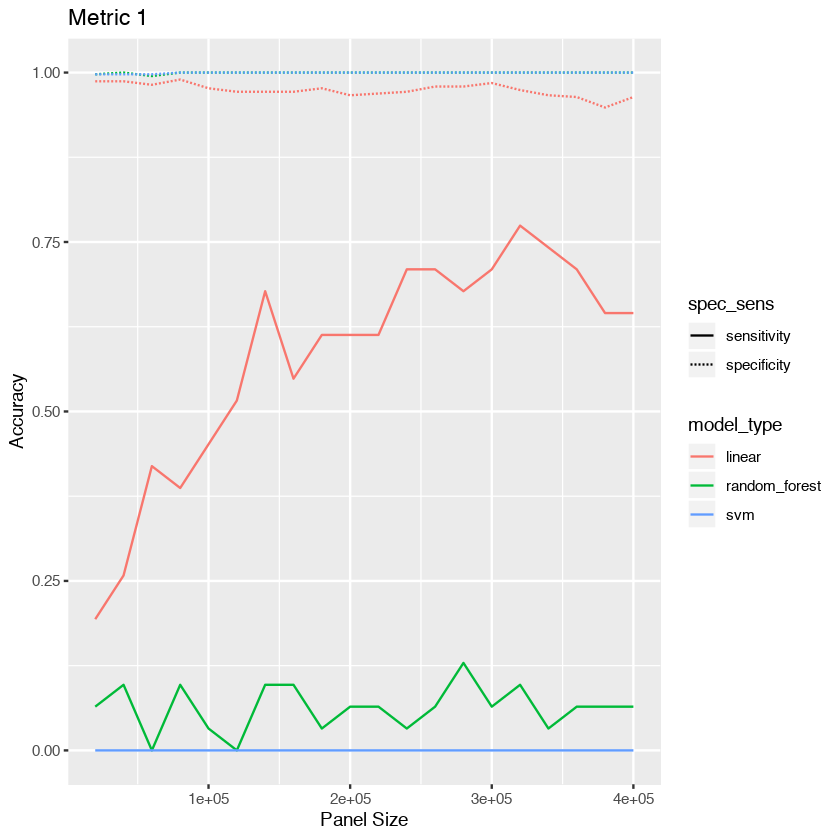

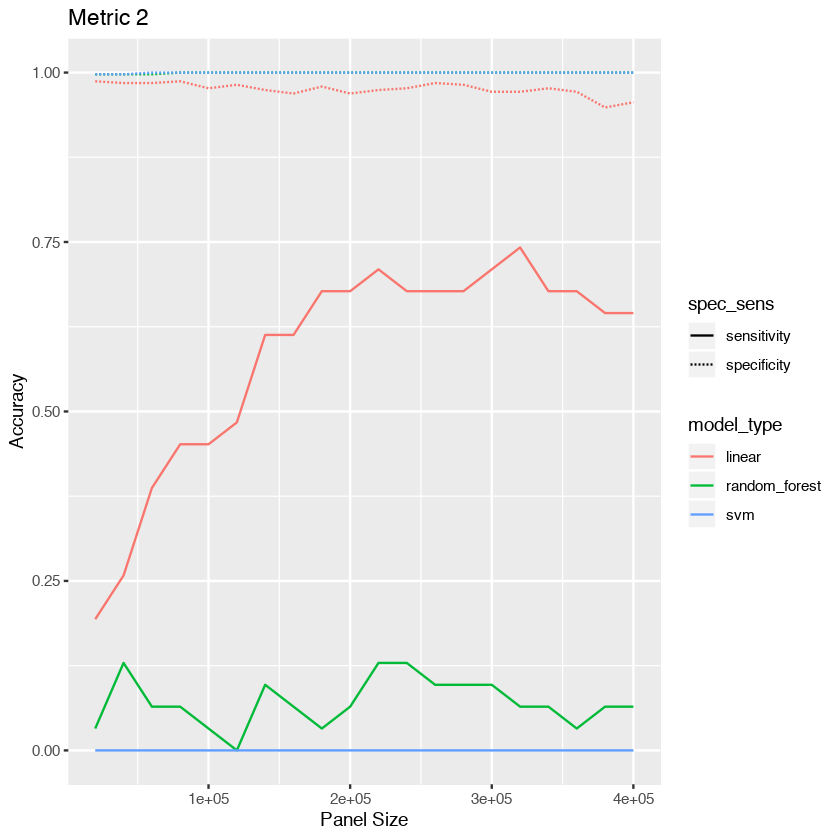

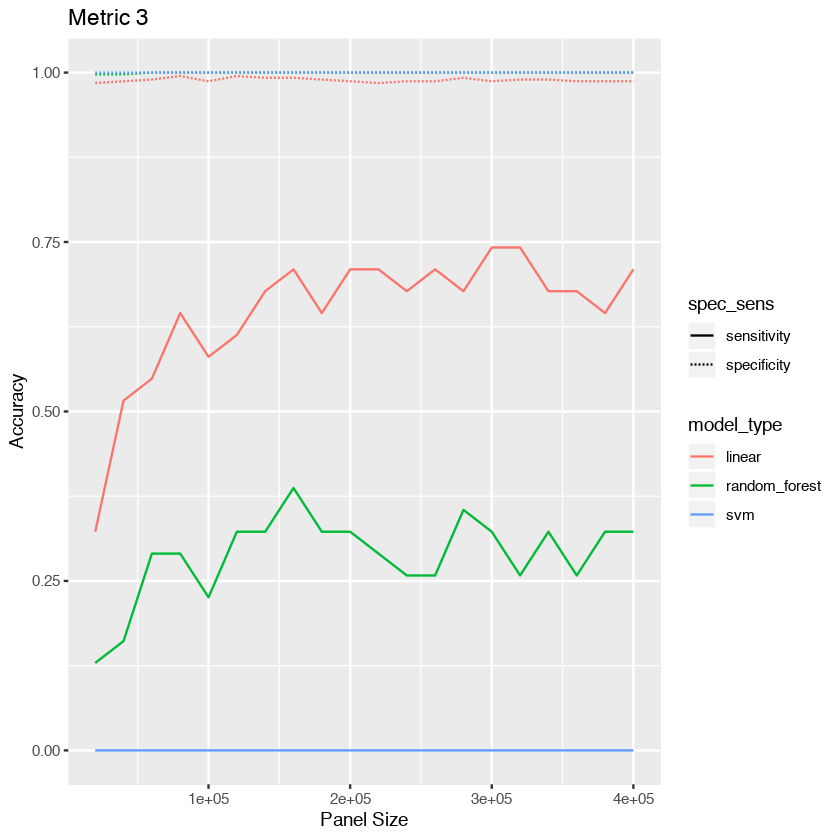

In [219]:
cor_sqrt_length_stats %>% 
    ggplot(aes(x = lengths, y = results, colour = model_type, linetype = spec_sens)) + geom_line() + 
    labs(x = "Panel Size", y = "Accuracy", title = "Metric 1")

p_length_stats %>% 
    ggplot(aes(x = lengths, y = results, colour = model_type, linetype = spec_sens)) + geom_line() + 
    labs(x = "Panel Size", y = "Accuracy", title = "Metric 2")

cor_length_n_stats %>% 
    ggplot(aes(x = lengths, y = results, colour = model_type, linetype = spec_sens)) + geom_line() + 
    labs(x = "Panel Size", y = "Accuracy", title = "Metric 3")

In [205]:
b_lung_data <- list()
b_lung_data[["training_data"]] <- balance_data(lung_data[["training_data"]])
b_lung_data[["test_data"]] <- lung_data[["test_data"]]


In [215]:
b_cor_sqrt_length_stats <- analyse_gene_panel_lengths(b_lung_data, panel_sizes, method_cor_over_sqrt_length, all_lung_stats)
b_p_length_stats <- analyse_gene_panel_lengths(b_lung_data, panel_sizes, method_p_over_length, all_lung_stats)
b_cor_length_n_stats <- analyse_gene_panel_lengths(b_lung_data, panel_sizes, method_cor_length_n, all_lung_stats)



[1] 20


1
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”2
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”3
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”4
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”5
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”6
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”7
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”8
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”9
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”1

[1] 20


1
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”2
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”3
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”4
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”5
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”6
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”7
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”8
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”9
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”1

[1] 20


1
2
3
4
5
6
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”7
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”8
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”9
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”10
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”11
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”12
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”13
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”14
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may 

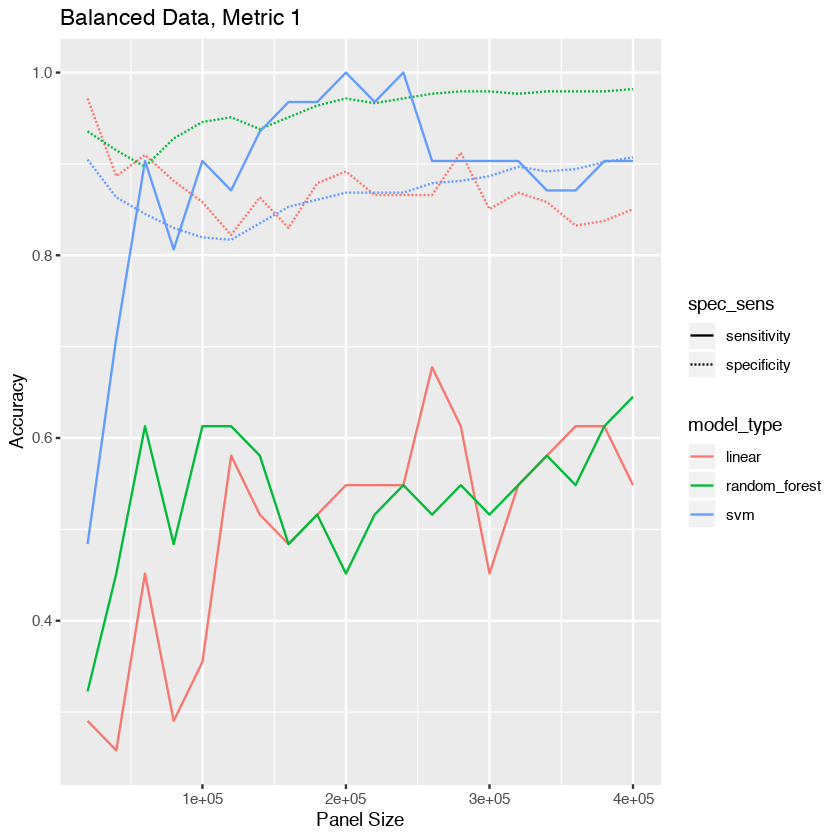

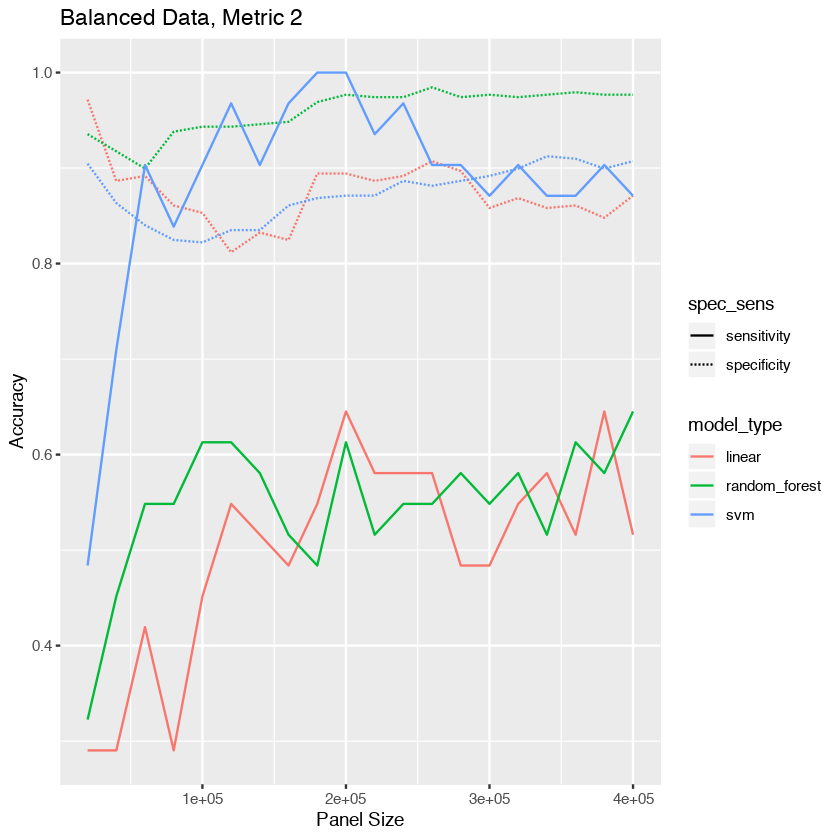

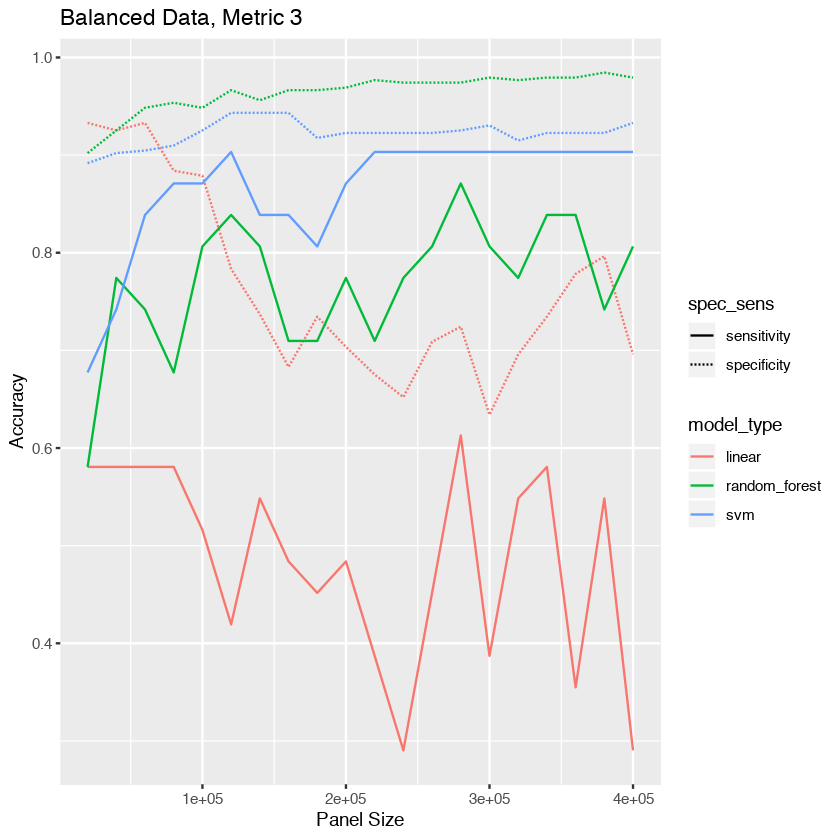

In [220]:
b_cor_sqrt_length_stats %>% 
    ggplot(aes(x = lengths, y = results, colour = model_type, linetype = spec_sens)) + geom_line() + 
    labs(x = "Panel Size", y = "Accuracy", title = "Balanced Data, Metric 1")

b_p_length_stats %>% 
    ggplot(aes(x = lengths, y = results, colour = model_type, linetype = spec_sens)) + geom_line() + 
    labs(x = "Panel Size", y = "Accuracy", title = "Balanced Data, Metric 2")

b_cor_length_n_stats %>% 
    ggplot(aes(x = lengths, y = results, colour = model_type, linetype = spec_sens)) + geom_line() + 
    labs(x = "Panel Size", y = "Accuracy", title = "Balanced Data, Metric 3")

In [221]:
get_gene_panel_for_size(all_lung_stats, method_cor_length_n, 2.5 * 10**5)

[[1]]
[1] "TP53"

[[2]]
[1] "REG3A"

[[3]]
[1] "POM121L12"

[[4]]
[1] "REG1B"

[[5]]
[1] "CDKN2A"

[[6]]
[1] "TPTE"

[[7]]
[1] "REG1A"

[[8]]
[1] "OR8H2"

[[9]]
[1] "OR2T3"

[[10]]
[1] "OR2T33"

[[11]]
[1] "DEFB110"

[[12]]
[1] "OR1C1"

[[13]]
[1] "CDH10"

[[14]]
[1] "DEFB115"

[[15]]
[1] "OR2L13"

[[16]]
[1] "LCE2B"

[[17]]
[1] "OR5L2"

[[18]]
[1] "OR8J3"

[[19]]
[1] "OR4A15"

[[20]]
[1] "OR2W3"

[[21]]
[1] "REG3G"

[[22]]
[1] "OR2G6"

[[23]]
[1] "RPL10L"

[[24]]
[1] "OR6F1"

[[25]]
[1] "OR5L1"

[[26]]
[1] "HBB"

[[27]]
[1] "BRINP3"

[[28]]
[1] "SPATA8"

[[29]]
[1] "OR4A5"

[[30]]
[1] "ZNF536"

[[31]]
[1] "OR8I2"

[[32]]
[1] "OR2T12"

[[33]]
[1] "OR2AK2"

[[34]]
[1] "MYF5"

[[35]]
[1] "OR4N2"

[[36]]
[1] "LCE1C"

[[37]]
[1] "OR2T4"

[[38]]
[1] "OR5D18"

[[39]]
[1] "ZP4"

[[40]]
[1] "OR10G8"

[[41]]
[1] "HTN1"

[[42]]
[1] "OR4M2"

[[43]]
[1] "ZNF716"

[[44]]
[1] "OR5B12"

[[45]]
[1] "OR5D14"

[[46]]
[1] "OR11L1"

[[47]]
[1] "OR5F1"

[[48]]
[1] "HIST1H3B"

[[49]]
[1] "OR2G3"

[[50]]
[1] "OR4C6"

[[51]]
[1] "PRAC1"

[[52]]
[1] "OR4Q3"

[[53]]
[1] "GCSAML"

[[54]]
[1] "DCAF4L2"

[[55]]
[1] "OR4L1"

[[56]]
[1] "NTM"

[[57]]
[1] "OR2T10"

[[58]]
[1] "ST6GAL2"

[[59]]
[1] "OR14A16"

[[60]]
[1] "OR2L3"

[[61]]
[1] "SMR3B"

[[62]]
[1] "RGS7"

[[63]]
[1] "OR2M2"

[[64]]
[1] "SGCZ"

[[65]]
[1] "OR5AS1"

[[66]]
[1] "OR2M5"

[[67]]
[1] "OR2L8"

[[68]]
[1] "MPPED2"

[[69]]
[1] "OR8K1"

[[70]]
[1] "OR2G2"

[[71]]
[1] "TGIF2LX"

[[72]]
[1] "OR5D13"

[[73]]
[1] "CDH18"

[[74]]
[1] "CDH12"

[[75]]
[1] "OR5T1"

[[76]]
[1] "OR2M7"

[[77]]
[1] "ZNF479"

[[78]]
[1] "FCRL1"

[[79]]
[1] "OR4C15"

[[80]]
[1] "OR5W2"

[[81]]
[1] "OR2T34"

[[82]]
[1] "OR8H3"

[[83]]
[1] "TMEM207"

[[84]]
[1] "CSMD3"

[[85]]
[1] "CDH9"

[[86]]
[1] "TAS2R1"

[[87]]
[1] "OR4K15"

[[88]]
[1] "MBL2"

[[89]]
[1] "OR8D2"

[[90]]
[1] "LCE1E"

[[91]]
[1] "LCE3D"

[[92]]
[1] "TRIM51"

[[93]]
[1] "OR4C46"

[[94]]
[1] "PAPPA2"

[[95]]
[1] "FAM24A"

[[96]]
[1] "OR4K2"

[[97]]
[1] "GABRA2"

[[98]]
[1] "SORCS1"

[[99]]
[1] "OR6K2"

[[100]]
[1] "ZNF804A"

[[101]]
[1] "CETN1"

[[102]]
[1] "PLN"

[[103]]
[1] "OR2M3"

[[104]]
[1] "OR8K3"

[[105]]
[1] "FAM47A"

[[106]]
[1] "KIF2B"

[[107]]
[1] "OR4P4"

[[108]]
[1] "OR8K5"

[[109]]
[1] "DEFB112"

[[110]]
[1] "FTMT"

[[111]]
[1] "FBXL7"

[[112]]
[1] "LCE2D"

[[113]]
[1] "OR13G1"

[[114]]
[1] "LHX8"

[[115]]
[1] "PYHIN1"

[[116]]
[1] "OR10K2"

[[117]]
[1] "HIST1H2BF"

[[118]]
[1] "HCN1"

[[119]]
[1] "NPAP1"

[[120]]
[1] "NLRP3"

[[121]]
[1] "ST6GALNAC3"

[[122]]
[1] "CALN1"

[[123]]
[1] "SNTG1"

[[124]]
[1] "LCE2C"

[[125]]
[1] "OR10W1"

[[126]]
[1] "OR10T2"

[[127]]
[1] "CARD18"

[[128]]
[1] "OR5M9"

[[129]]
[1] "LRRC4C"

[[130]]
[1] "UQCR11"

[[131]]
[1] "GALNT13"

[[132]]
[1] "OR10AG1"

[[133]]
[1] "SLN"

[[134]]
[1] "KCNJ12"

[[135]]
[1] "TRIM58"

[[136]]
[1] "DKK2"

[[137]]
[1] "GRM8"

[[138]]
[1] "RGS18"

[[139]]
[1] "TRIM48"

[[140]]
[1] "DCAF12L1"

[[141]]
[1] "LRRTM4"

[[142]]
[1] "PDHA2"

[[143]]
[1] "SPANXN1"

[[144]]
[1] "OR5T3"

[[145]]
[1] "CHRM2"

[[146]]
[1] "FAM135B"

[[147]]
[1] "HIST1H2BH"

[[148]]
[1] "CD1A"

[[149]]
[1] "PGK2"

[[150]]
[1] "OR2L2"

[[151]]
[1] "TECRL"

[[152]]
[1] "OR1S2"

[[153]]
[1] "GNGT1"

[[154]]
[1] "OR5H15"

[[155]]
[1] "CNBD1"

[[156]]
[1] "PCDH15"

[[157]]
[1] "LCE3A"

[[158]]
[1] "SPRR2G"

[[159]]
[1] "MMP16"

[[160]]
[1] "OR2B11"

[[161]]
[1] "HIST1H2AC"

[[162]]
[1] "OR10K1"

[[163]]
[1] "CTSG"

[[164]]
[1] "CYYR1"

[[165]]
[1] "LRRC30"

[[166]]
[1] "OR5R1"

[[167]]
[1] "OR6K6"

[[168]]
[1] "ASB5"

[[169]]
[1] "COL11A1"

[[170]]
[1] "PSG8"

[[171]]
[1] "CCER1"

[[172]]
[1] "SGCD"

[[173]]
[1] "OR5D16"

[[174]]
[1] "ACSM2A"

[[175]]
[1] "SLITRK3"

[[176]]
[1] "MYCT1"

[[177]]
[1] "BCHE"

[[178]]
[1] "OR14C36"

[[179]]
[1] "LCE1F"

[[180]]
[1] "MS4A13"

[[181]]
[1] "CST5"

[[182]]
[1] "OR4D5"

[[183]]
[1] "HGF"

[[184]]
[1] "HIST1H2BC"

[[185]]
[1] "TUBA3C"

[[186]]
[1] "CA10"

[[187]]
[1] "RUNX1T1"

[[188]]
[1] "LRFN5"

[[189]]
[1] "OR10Q1"

[[190]]
[1] "KCNJ3"

[[191]]
[1] "RHOH"

[[192]]
[1]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


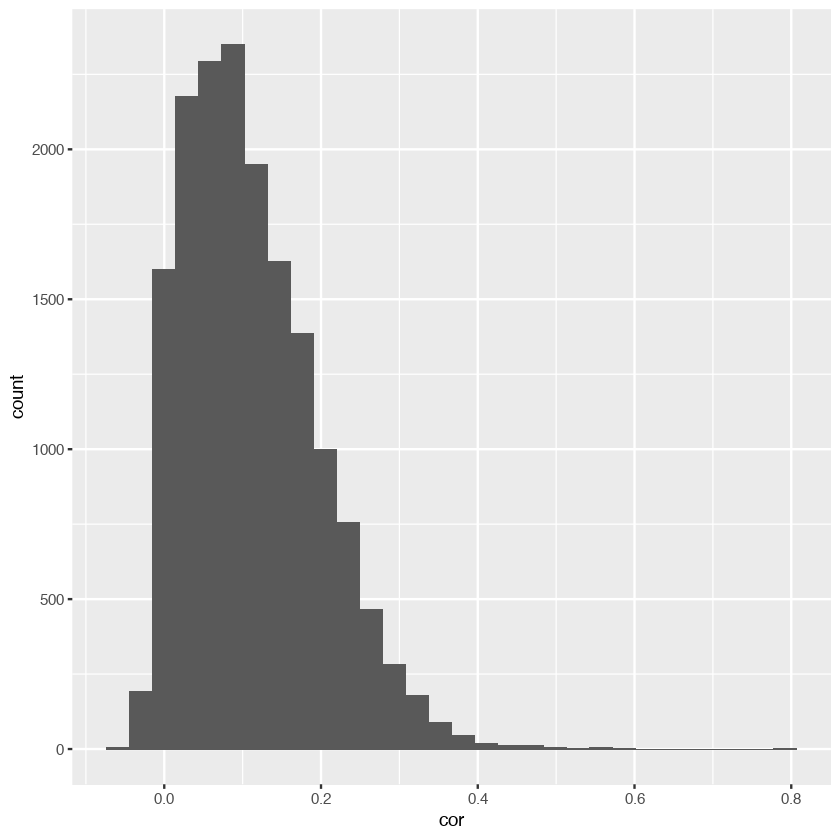

In [227]:
all_lung_stats %>% 
     ggplot(aes(cor)) + geom_histogram()


In [251]:
cor_sqrt_length_cor <- analyse_gene_panel_lengths(lung_data, panel_sizes, method_cor_over_sqrt_length, all_lung_stats, type = "R")
p_length_cor <- analyse_gene_panel_lengths(lung_data, panel_sizes, method_p_over_length, all_lung_stats, type = "R")
cor_length_n_cor <- analyse_gene_panel_lengths(lung_data, panel_sizes, method_cor_length_n, all_lung_stats, type = "R")


[1] 20


1
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”2
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”3
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”4
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”5
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”6
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”7
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”8
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”9
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”1

[1] 20


1
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”2
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”3
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”4
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”5
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”6
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”7
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”8
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”9
Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”1

[1] 20


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


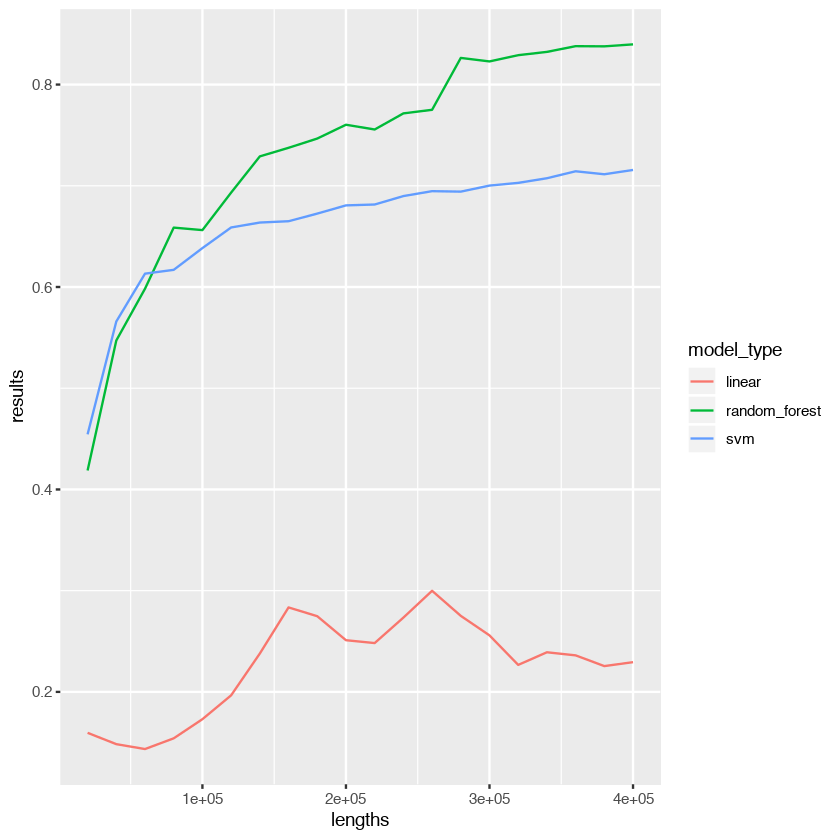

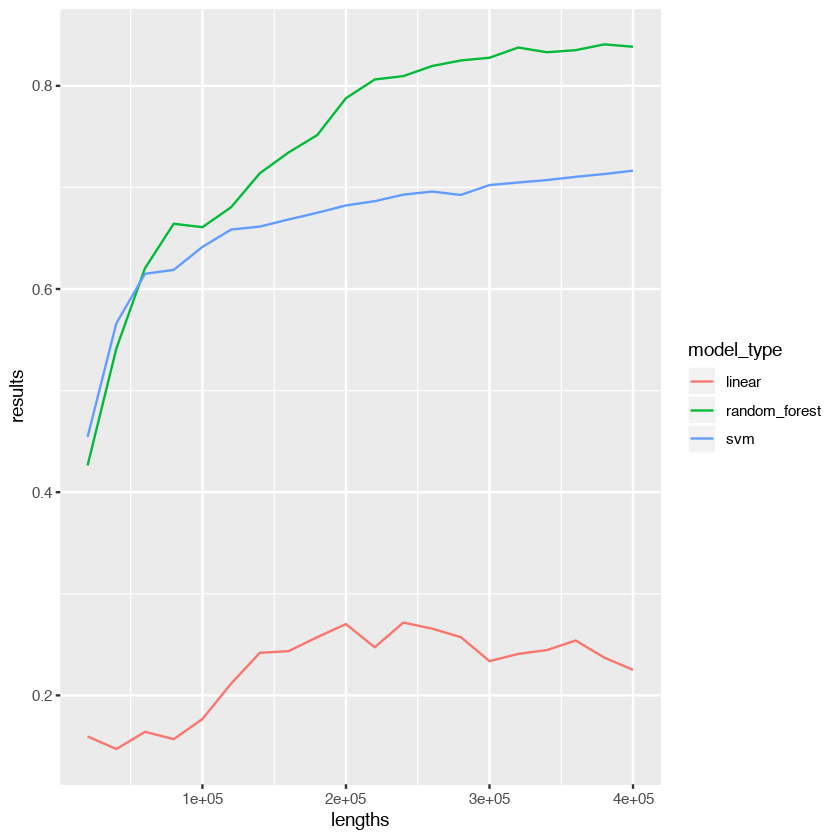

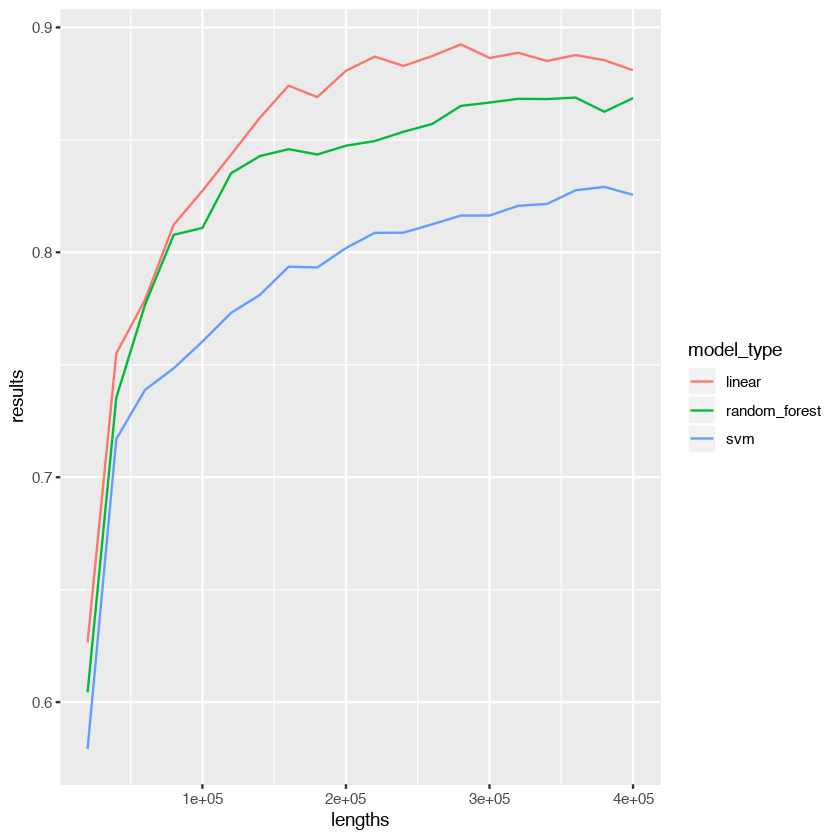

In [252]:
cor_sqrt_length_cor %>% 
    ggplot(aes(x = lengths, y = results, colour = model_type)) + geom_line()

p_length_cor %>% 
    ggplot(aes(x = lengths, y = results, colour = model_type)) + geom_line()

cor_length_n_cor %>% 
    ggplot(aes(x = lengths, y = results, colour = model_type)) + geom_line()

In [263]:
all_lung_stats %>% 
    filter(Hugo_Symbol == "HYOU1")

Hugo_Symbol,coefficient,p_val,cor,n,length
HYOU1,19.52261,8.790088e-24,0.3281546,15,3000


In [3]:
listAttributes(mart)

ERROR: Error in listAttributes(mart): could not find function "listAttributes"
